# Libraries 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression,RidgeCV,LassoCV, ElasticNetCV
sns.set()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import pickle
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [25]:
xls = pd.ExcelFile('NASSAgcensusDownload2017.xlsx')


In [28]:
County_Names= pd.read_excel(xls, 'County Names')
Crops_and_Plants=pd.read_excel(xls, 'Crops and Plants').sort_values(by='FIPS')
Farms=pd.read_excel(xls, 'Farms').sort_values(by='FIPS')
Livestock_and_Animals=pd.read_excel(xls, 'Livestock and Animals').sort_values(by='FIPS')
Producers=pd.read_excel(xls, 'Producers').sort_values(by='FIPS')
Variable_Lookup=pd.read_excel(xls, 'Variable Lookup')
Economics=pd.read_excel(xls, 'Economics')

In [29]:
Economics.head()


FIPS  FIPSTEXT  y17_M011_valueText y17_M011_classRange  \
0     0         0               58.03                 NaN   
1  1001      1001               57.68             50 - 59   
2  1003      1003               60.57             60 - 74   
3  1005      1005               64.26             60 - 74   
4  1007      1007               72.68             60 - 74   

   y17_M011_valueNumeric  y17_M012_valueText y17_M012_classRange  \
0                  58.03               30.49                 NaN   
1                  57.68               38.27             30 - 39   
2                  60.57               28.86             20 - 29   
3                  64.26               26.31             20 - 29   
4                  72.68               25.85             20 - 29   

   y17_M012_valueNumeric  y17_M013_valueText y17_M013_classRange  ...  \
0                  30.49               11.48                 NaN  ...   
1                  38.27                4.04               1 - 4  ...   
2                  28.86               10.57             10 - 24  ...   
3                  26.31                9.44               5 - 9  ...   
4                  25.85                1.46               1 - 4  ...   

   y17_M073_valueNumeric y17_M074_valueText y17_M074_classRange  \
0               133363.0                 79                 NaN   
1                96682.0                 41             25 - 49   
2               136496.0                 53             50 - 74   
3                87026.0                 28             25 - 49   
4                68656.0                 29             25 - 49   

   y17_M074_valueNumeric y17_M075_valueText y17_M075_classRange  \
0                   79.0                661                 NaN   
1                   41.0                104       Less than 200   
2                   53.0                216           200 - 399   
3                   28.0                161       Less than 200   
4                   29.0                (D)           200 - 399   

   y17_M075_valueNumeric y17_M202_valueText y17_M202_classRange  \
0                  661.0             400603                 NaN   
1                  104.0                  0    Less than 50,000   
2                  216.0                  0    Less than 50,000   
3                  161.0                (D)    Less than 50,000   
4                    NaN                  0    Less than 50,000   

   y17_M202_valueNumeric  
0               400603.0  
1                    0.0  
2                    0.0  
3                    NaN  
4                    0.0  

[5 rows x 152 columns]

In [30]:
Crops_and_Plants.head(2)

FIPS  FIPSTEXT y17_M123_valueText y17_M123_classRange  \
0     0         0              14.60                 NaN   
1  1001      1001                (D)         Less than 5   

   y17_M123_valueNumeric y17_M124_valueText y17_M124_classRange  \
0                   14.6              26.48                 NaN   
1                    NaN               2.34         Less than 5   

   y17_M124_valueNumeric y17_M125_valueText y17_M125_classRange  ...  \
0                  26.48              -1.63                 NaN  ...   
1                   2.34               0.43         Sparse Data  ...   

   y17_M197_valueNumeric y17_M198_valueText y17_M198_classRange  \
0                  22.35               9.77                 NaN   
1                   0.00              82.03             75 - 94   

   y17_M198_valueNumeric y17_M199_valueText y17_M199_classRange  \
0                   9.77               7.41                 NaN   
1                  82.03               0.00         Less than 1   

   y17_M199_valueNumeric y17_M200_valueText y17_M200_classRange  \
0                   7.41               1.24                 NaN   
1                   0.00               0.27         Less than 1   

   y17_M200_valueNumeric  
0                   1.24  
1                   0.27  

[2 rows x 236 columns]

In [31]:
Crops_and_Plants.head(2)

FIPS  FIPSTEXT y17_M123_valueText y17_M123_classRange  \
0     0         0              14.60                 NaN   
1  1001      1001                (D)         Less than 5   

   y17_M123_valueNumeric y17_M124_valueText y17_M124_classRange  \
0                   14.6              26.48                 NaN   
1                    NaN               2.34         Less than 5   

   y17_M124_valueNumeric y17_M125_valueText y17_M125_classRange  ...  \
0                  26.48              -1.63                 NaN  ...   
1                   2.34               0.43         Sparse Data  ...   

   y17_M197_valueNumeric y17_M198_valueText y17_M198_classRange  \
0                  22.35               9.77                 NaN   
1                   0.00              82.03             75 - 94   

   y17_M198_valueNumeric y17_M199_valueText y17_M199_classRange  \
0                   9.77               7.41                 NaN   
1                  82.03               0.00         Less than 1   

   y17_M199_valueNumeric y17_M200_valueText y17_M200_classRange  \
0                   7.41               1.24                 NaN   
1                   0.00               0.27         Less than 1   

   y17_M200_valueNumeric  
0                   1.24  
1                   0.27  

[2 rows x 236 columns]

In [32]:
Farms.head()

FIPS  FIPSTEXT  y17_M001_valueText y17_M001_classRange  \
0     0         0             2042220                 NaN   
1  1001      1001                 371           250 - 499   
2  1003      1003                 842           750 - 999   
3  1005      1005                 498           250 - 499   
4  1007      1007                 205       Less than 250   

   y17_M001_valueNumeric  y17_M002_valueText y17_M002_classRange  \
0                2042220               -0.87                 NaN   
1                    371               -0.17         Sparse Data   
2                    842               -0.59   Negligible Change   
3                    498               -0.50   Negligible Change   
4                    205                0.27         Sparse Data   

   y17_M002_valueNumeric y17_M003_valueText y17_M003_classRange  ...  \
0                  -0.87                441                 NaN  ...   
1                  -0.17                305           180 - 499  ...   
2                  -0.59                208           180 - 499  ...   
3                  -0.50                307           180 - 499  ...   
4                   0.27                273           180 - 499  ...   

   y17_M091_valueNumeric  y17_M092_valueText y17_M092_classRange  \
0                  85.75                6.37                 NaN   
1                  93.26                4.58         Less than 5   
2                  85.27                5.34               5 - 9   
3                  93.37                3.21         Less than 5   
4                  93.17                1.95         Less than 5   

   y17_M092_valueNumeric  y17_M093_valueText y17_M093_classRange  \
0                   6.37                5.72                 NaN   
1                   4.58                1.35         Less than 2   
2                   5.34                7.24               5 - 9   
3                   3.21                2.81               2 - 4   
4                   1.95                4.88               2 - 4   

   y17_M093_valueNumeric  y17_M201_valueText y17_M201_classRange  \
0                   5.72               75.41                 NaN   
1                   1.35               76.82             75 - 84   
2                   7.24               78.15             75 - 84   
3                   2.81               60.64             55 - 64   
4                   4.88               73.17             65 - 74   

   y17_M201_valueNumeric  
0                  75.41  
1                  76.82  
2                  78.15  
3                  60.64  
4                  73.17  

[5 rows x 110 columns]

In [33]:
Livestock_and_Animals.head(2)

FIPS  FIPSTEXT y17_M110_valueText y17_M110_classRange  \
0     0         0               1.18                 NaN   
1  1001      1001               0.20         Sparse Data   

   y17_M110_valueNumeric y17_M111_valueText y17_M111_classRange  \
0                   1.18                 10                 NaN   
1                   0.20                 15             10 - 24   

   y17_M111_valueNumeric y17_M112_valueText y17_M112_classRange  ...  \
0                   10.0           41261670                 NaN  ...   
1                   15.0               8678    Less than 10,000  ...   

   y17_M119_valueNumeric y17_M120_valueText y17_M120_classRange  \
0              2698636.0             537799                 NaN   
1                 1189.0                 81       Less than 100   

   y17_M120_valueNumeric y17_M121_valueText y17_M121_classRange  \
0               537799.0            2006439                 NaN   
1                   81.0               1003       1,000 - 1,499   

   y17_M121_valueNumeric y17_M122_valueText y17_M122_classRange  \
0              2006439.0            2847289                 NaN   
1                 1003.0                479           100 - 499   

   y17_M122_valueNumeric  
0              2847289.0  
1                  479.0  

[2 rows x 41 columns]

In [34]:
Producers.head(2)

FIPS  FIPSTEXT y17_M056_valueText y17_M056_classRange  \
0     0         0              59.60                 NaN   
1  1001      1001              80.27          75 or more   

   y17_M056_valueNumeric y17_M057_valueText y17_M057_classRange  \
0                  59.60              40.40                 NaN   
1                  80.27              19.73        Less than 25   

   y17_M057_valueNumeric  y17_M084_valueText y17_M084_classRange  ...  \
0                  40.40               68.99                 NaN  ...   
1                  19.73               63.34             55 - 64  ...   

   y17_M106_valueNumeric y17_M107_valueText y17_M107_classRange  \
0                   1.61               0.12                 NaN   
1                  15.36               0.00         Less than 1   

   y17_M107_valueNumeric  y17_M108_valueText y17_M108_classRange  \
0                   0.12               96.13                 NaN   
1                   0.00               84.91             75 - 89   

   y17_M108_valueNumeric y17_M109_valueText y17_M109_classRange  \
0                  96.13               4.22                 NaN   
1                  84.91               1.08         Less than 5   

   y17_M109_valueNumeric  
0                   4.22  
1                   1.08  

[2 rows x 77 columns]

In [35]:
result = pd.concat([Economics,Crops_and_Plants, Farms,Livestock_and_Animals,Producers], axis=1, sort=False)[1:]
results=result.T.reset_index().sort_values(by='index').iloc[9:].T
results

389                  391                    392  \
index  FIPSTEXT  y17_M001_classRange  y17_M001_valueNumeric   
1          1001            250 - 499                    371   
2          1003            750 - 999                    842   
3          1005            250 - 499                    498   
4          1007        Less than 250                    205   
...         ...                  ...                    ...   
3075      56037        Less than 250                    219   
3076      56039        Less than 250                    142   
3077      56041            250 - 499                    403   
3078      56043        Less than 250                    246   
3079      56045        Less than 250                    247   

                      390                  394                    395  \
index  y17_M001_valueText  y17_M002_classRange  y17_M002_valueNumeric   
1                     371          Sparse Data                  -0.17   
2                     842    Negligible Change                  -0.59   
3                     498    Negligible Change                   -0.5   
4                     205          Sparse Data                   0.27   
...                   ...                  ...                    ...   
3075                  219          Sparse Data                  -0.39   
3076                  142          Sparse Data                   -0.2   
3077                  403    Negligible Change                   0.58   
3078                  246          Sparse Data                   0.39   
3079                  247          Sparse Data                  -0.17   

                      393                  397                    398  \
index  y17_M002_valueText  y17_M003_classRange  y17_M003_valueNumeric   
1                   -0.17            180 - 499                    305   
2                   -0.59            180 - 499                    208   
3                    -0.5            180 - 499                    307   
4                    0.27            180 - 499                    273   
...                   ...                  ...                    ...   
3075                -0.39        2,000 or more                   6256   
3076                 -0.2            180 - 499                    476   
3077                 0.58          500 - 1,999                   1630   
3078                 0.39          500 - 1,999                   1285   
3079                -0.17        2,000 or more                   4968   

                      396  ...                 382                  386  \
index  y17_M003_valueText  ...  y17_M199_valueText  y17_M200_classRange   
1                     305  ...                0.00          Less than 1   
2                     208  ...                0.00                1 - 4   
3                     307  ...                0.00          Less than 1   
4                     273  ...                0.00          Less than 1   
...                   ...  ...                 ...                  ...   
3075                 6256  ...                0.00          Less than 1   
3076                  476  ...                 (D)                1 - 4   
3077                 1630  ...                0.00          Less than 1   
3078                 1285  ...                 (D)          Less than 1   
3079                 4968  ...                 (D)          Less than 1   

                         387                 385                  496  \
index  y17_M200_valueNumeric  y17_M200_valueText  y17_M201_classRange   
1                       0.27                0.27              75 - 84   
2                       2.85                2.85              75 - 84   
3                        0.2                 0.2              55 - 64   
4                          0                   0              65 - 74   
...                      ...                 ...                  ...   
3075                       0                   0              75 - 84   
3076            

In [36]:
new_header = results.iloc[0] 
# take the rest of your data minus the header row
df = results[1:] 
# set the header row as the df header
df.columns = new_header 
# Lets see the 5 first rows of the new dataset
df.head()


index FIPSTEXT y17_M001_classRange y17_M001_valueNumeric y17_M001_valueText  \
1         1001           250 - 499                   371                371   
2         1003           750 - 999                   842                842   
3         1005           250 - 499                   498                498   
4         1007       Less than 250                   205                205   
5         1009       1,000 or more                  1146               1146   

index y17_M002_classRange y17_M002_valueNumeric y17_M002_valueText  \
1             Sparse Data                 -0.17              -0.17   
2       Negligible Change                 -0.59              -0.59   
3       Negligible Change                  -0.5               -0.5   
4             Sparse Data                  0.27               0.27   
5       Negligible Change                 -0.28              -0.28   

index y17_M003_classRange y17_M003_valueNumeric y17_M003_valueText  ...  \
1               180 - 499                   305                305  ...   
2               180 - 499                   208                208  ...   
3               180 - 499                   307                307  ...   
4               180 - 499                   273                273  ...   
5                50 - 179                   129                129  ...   

index y17_M199_valueText y17_M200_classRange y17_M200_valueNumeric  \
1                   0.00         Less than 1                  0.27   
2                   0.00               1 - 4                  2.85   
3                   0.00         Less than 1                   0.2   
4                   0.00         Less than 1                     0   
5                   0.00         Less than 1                   0.7   

index y17_M200_valueText y17_M201_classRange y17_M201_valueNumeric  \
1                   0.27             75 - 84                 76.82   
2                   2.85             75 - 84                 78.15   
3                    0.2             55 - 64                 60.64   
4                      0             65 - 74                 73.17   
5                    0.7             65 - 74                 74.61   

index y17_M201_valueText y17_M202_classRange y17_M202_valueNumeric  \
1                  76.82    Less than 50,000                     0   
2                  78.15    Less than 50,000                     0   
3                  60.64    Less than 50,000                   NaN   
4                  73.17    Less than 50,000                     0   
5                  74.61    Less than 50,000                   NaN   

index y17_M202_valueText  
1                      0  
2                      0  
3                    (D)  
4                      0  
5                    (D)  

[5 rows x 607 columns]

In [37]:
df1=df.reset_index().drop(columns='index').copy()
df1

index FIPSTEXT y17_M001_classRange y17_M001_valueNumeric y17_M001_valueText  \
0         1001           250 - 499                   371                371   
1         1003           750 - 999                   842                842   
2         1005           250 - 499                   498                498   
3         1007       Less than 250                   205                205   
4         1009       1,000 or more                  1146               1146   
...        ...                 ...                   ...                ...   
3074     56037       Less than 250                   219                219   
3075     56039       Less than 250                   142                142   
3076     56041           250 - 499                   403                403   
3077     56043       Less than 250                   246                246   
3078     56045       Less than 250                   247                247   

index y17_M002_classRange y17_M002_valueNumeric y17_M002_valueText  \
0             Sparse Data                 -0.17              -0.17   
1       Negligible Change                 -0.59              -0.59   
2       Negligible Change                  -0.5               -0.5   
3             Sparse Data                  0.27               0.27   
4       Negligible Change                 -0.28              -0.28   
...                   ...                   ...                ...   
3074          Sparse Data                 -0.39              -0.39   
3075          Sparse Data                  -0.2               -0.2   
3076    Negligible Change                  0.58               0.58   
3077          Sparse Data                  0.39               0.39   
3078          Sparse Data                 -0.17              -0.17   

index y17_M003_classRange y17_M003_valueNumeric y17_M003_valueText  ...  \
0               180 - 499                   305                305  ...   
1               180 - 499                   208                208  ...   
2               180 - 499                   307                307  ...   
3               180 - 499                   273                273  ...   
4                50 - 179                   129                129  ...   
...                   ...                   ...                ...  ...   
3074        2,000 or more                  6256               6256  ...   
3075            180 - 499                   476                476  ...   
3076          500 - 1,999                  1630               1630  ...   
3077          500 - 1,999                  1285               1285  ...   
3078        2,000 or more                  4968               4968  ...   

index y17_M199_valueText y17_M200_classRange y17_M200_valueNumeric  \
0                   0.00         Less than 1                  0.27   
1                   0.00               1 - 4                  2.85   
2                   0.00         Less than 1                   0.2   
3                   0.00         Less than 1                     0   
4                   0.00         Less than 1                   0.7   
...                  ...                 ...                   ...   
3074                0.00         Less than 1                     0   
3075                 (D)               1 - 4                  1.41   
3076                0.00         Less than 1                     0   
3077                 (D)         Less than 1                     0   
3078                 (D)         Less than 1                  0.81   

index y17_M200_valueText y17_M201_classRange y17_M201_valueNumeric  \
0                   0.27             75 - 84                 76.82   
1                   2.85             75 - 84                 78.15   
2                    0.2             55 - 64                 60.64   
3                      0             65 - 74                 73.17   
4                    0.7             65 - 74                 74.61   
...                  ...                 ...    

In [38]:
# Obtain all numerical data 
list_num=[]
for i in df1.columns:
    if 'Numeric' in i:
        list_num.append(i)
list_num[:3]

['y17_M001_valueNumeric', 'y17_M002_valueNumeric', 'y17_M003_valueNumeric']

In [39]:
len(County_Names['StateName'])

3079

In [45]:
data_num1=df1[list_num]
data_num1['STATE']=County_Names['StateName']

In [46]:
data_num1.head()

index y17_M001_valueNumeric y17_M002_valueNumeric y17_M003_valueNumeric  \
0                       371                 -0.17                   305   
1                       842                 -0.59                   208   
2                       498                  -0.5                   307   
3                       205                  0.27                   273   
4                      1146                 -0.28                   129   

index y17_M004_valueNumeric y17_M005_valueNumeric y17_M006_valueNumeric  \
0                      0.03                 -0.16                 -0.13   
1                      0.01                 -0.47                 -1.05   
2                     -0.06                  0.56                 -0.69   
3                      0.44                 -0.05                 -0.25   
4                      0.04                 -0.22                 -0.54   

index y17_M007_valueNumeric y17_M008_valueNumeric y17_M009_valueNumeric  \
0                     -0.21                  0.05                     0   
1                     -0.79                  0.36                  0.44   
2                     -0.63                 -0.38                  0.23   
3                      0.54                 -1.38                 -0.23   
4                      0.23                 -0.12                  0.42   

index y17_M010_valueNumeric  ... y17_M194_valueNumeric y17_M195_valueNumeric  \
0                     -0.27  ...                     0                     0   
1                     -0.46  ...                     0                  0.01   
2                     -1.02  ...                     0                     0   
3                      1.47  ...                   NaN                     0   
4                     -0.62  ...                     0                     0   

index y17_M196_valueNumeric y17_M197_valueNumeric y17_M198_valueNumeric  \
0                         0                     0                 82.03   
1                      0.14                   NaN                   NaN   
2                         0                     0                 98.99   
3                         0                     0                   NaN   
4                         0                     0                  0.45   

index y17_M199_valueNumeric y17_M200_valueNumeric y17_M201_valueNumeric  \
0                         0                  0.27                 76.82   
1                         0                  2.85                 78.15   
2                         0                   0.2                 60.64   
3                         0                     0                 73.17   
4                         0                   0.7                 74.61   

index y17_M202_valueNumeric    STATE  
0                         0  Alabama  
1                         0  Alabama  
2                       NaN  Alabama  
3                         0  Alabama  
4                       NaN  Alabama  

[5 rows x 203 columns]

In [47]:
# map the country name and seperate into four different regions
County_Names
countries_dict = {
    'Washington' : 0,
    'Oregon' : 0,
    'California' : 0,
    'Nevada' : 0,
    'Idaho' : 0,
    'Utah' : 0,
    'Arizona' : 0,
    'New Mexico' : 0,
    'Montana' : 0,
    'Wyoming' : 0,
    'Alaska' : 0,
    'Hawaii' : 0,
    'Texas' : 1,
    'Oklahoma' : 1,
    'Kansas' : 1,
    'Colorado' : 1,
    'Nebraska' : 1,
    'South Dakota' : 1,
    'North Dakota' : 1,
    'Minnesota' : 1,
    'Iowa' : 1,
    'Missouri' : 1,
    'Illinois' : 1,
    'Wisconsin' : 1,
    'Arkansas' : 2,
    'Louisiana' : 2,
    'Louisana' : 2,
    'Mississippi' : 2,
    'Alabama' : 2,
    'Tennessee' : 2,
    'Florida' : 2,
    'Georgia' : 2,
    'South Carolina' : 2,
    'North Carolina' : 2,
    'Kentucky' : 2,
    'Indiana' : 2,
    'Ohio' : 2,
    'Michigan' : 2,
    'Maine' : 3,
    'Vermont' : 3,
    'New Hampshire' : 3,
    'Massachusetts' : 3,
    'New York' : 3,
    'Rhode Island' : 3,
    'Connecticut' : 3,
    'New Jersey' : 3,
    'Pennsylvania' : 3,
    'Delaware' : 3,
    'Maryland' : 3,
    'West Virginia' : 3,
    'Virginia' : 3
}

In [54]:
data_num1['region']=data_num1['STATE'].replace(countries_dict)

In [53]:
data_num=data_num1.drop(columns='STATE')
data_num.head()

index y17_M001_valueNumeric y17_M002_valueNumeric y17_M003_valueNumeric  \
0                       371                 -0.17                   305   
1                       842                 -0.59                   208   
2                       498                  -0.5                   307   
3                       205                  0.27                   273   
4                      1146                 -0.28                   129   

index y17_M004_valueNumeric y17_M005_valueNumeric y17_M006_valueNumeric  \
0                      0.03                 -0.16                 -0.13   
1                      0.01                 -0.47                 -1.05   
2                     -0.06                  0.56                 -0.69   
3                      0.44                 -0.05                 -0.25   
4                      0.04                 -0.22                 -0.54   

index y17_M007_valueNumeric y17_M008_valueNumeric y17_M009_valueNumeric  \
0                     -0.21                  0.05                     0   
1                     -0.79                  0.36                  0.44   
2                     -0.63                 -0.38                  0.23   
3                      0.54                 -1.38                 -0.23   
4                      0.23                 -0.12                  0.42   

index y17_M010_valueNumeric  ... y17_M194_valueNumeric y17_M195_valueNumeric  \
0                     -0.27  ...                     0                     0   
1                     -0.46  ...                     0                  0.01   
2                     -1.02  ...                     0                     0   
3                      1.47  ...                   NaN                     0   
4                     -0.62  ...                     0                     0   

index y17_M196_valueNumeric y17_M197_valueNumeric y17_M198_valueNumeric  \
0                         0                     0                 82.03   
1                      0.14                   NaN                   NaN   
2                         0                     0                 98.99   
3                         0                     0                   NaN   
4                         0                     0                  0.45   

index y17_M199_valueNumeric y17_M200_valueNumeric y17_M201_valueNumeric  \
0                         0                  0.27                 76.82   
1                         0                  2.85                 78.15   
2                         0                   0.2                 60.64   
3                         0                     0                 73.17   
4                         0                   0.7                 74.61   

index y17_M202_valueNumeric   region  
0                         0  region2  
1                         0  region2  
2                       NaN  region2  
3                         0  region2  
4                       NaN  region2  

[5 rows x 203 columns]

In [46]:
# check the size of our data 
data_num.shape

(3079, 203)

In [56]:
# check how many null and missing data 
nulldata1=pd.DataFrame(data_num.isnull().sum()).reset_index()
nulldata1.columns=['MapTitle','null_amount']
nulldata1.head()

MapTitle  null_amount
0  y17_M001_valueNumeric            0
1  y17_M002_valueNumeric            0
2  y17_M003_valueNumeric           13
3  y17_M004_valueNumeric            0
4  y17_M005_valueNumeric            0

In [57]:
# only return column names who's data missing less than 20%
list_1=[]
for i  in range(len(nulldata1['null_amount'])):
    if nulldata1['null_amount'][i] < len(data_num)*0.2:
        list_1.append(nulldata1['MapTitle'][i])

In [58]:
# only using the data whose missing data less than 20%
new_data=data_num[list_1]
new_data.columns

Index(['y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric', 'y17_M010_valueNumeric',
       ...
       'y17_M167_valueNumeric', 'y17_M168_valueNumeric',
       'y17_M183_valueNumeric', 'y17_M186_valueNumeric',
       'y17_M193_valueNumeric', 'y17_M195_valueNumeric',
       'y17_M196_valueNumeric', 'y17_M200_valueNumeric',
       'y17_M201_valueNumeric', 'region'],
      dtype='object', name='index', length=147)

In [59]:
# fill all missing data with median
my_data=new_data.fillna(new_data.median())
my_data.isnull().sum()

index
y17_M001_valueNumeric    0
y17_M002_valueNumeric    0
y17_M003_valueNumeric    0
y17_M004_valueNumeric    0
y17_M005_valueNumeric    0
                        ..
y17_M195_valueNumeric    0
y17_M196_valueNumeric    0
y17_M200_valueNumeric    0
y17_M201_valueNumeric    0
region                   0
Length: 147, dtype: int64

In [61]:
#import pickle to save output 
import pickle
#save the output locally
pickle_out=open('my_data', 'wb')
pickle.dump(my_data, pickle_out)
pickle_out.close()



In [62]:
pickle_in = open("my_data","rb")
my_data = pickle.load(pickle_in)

# Distribution

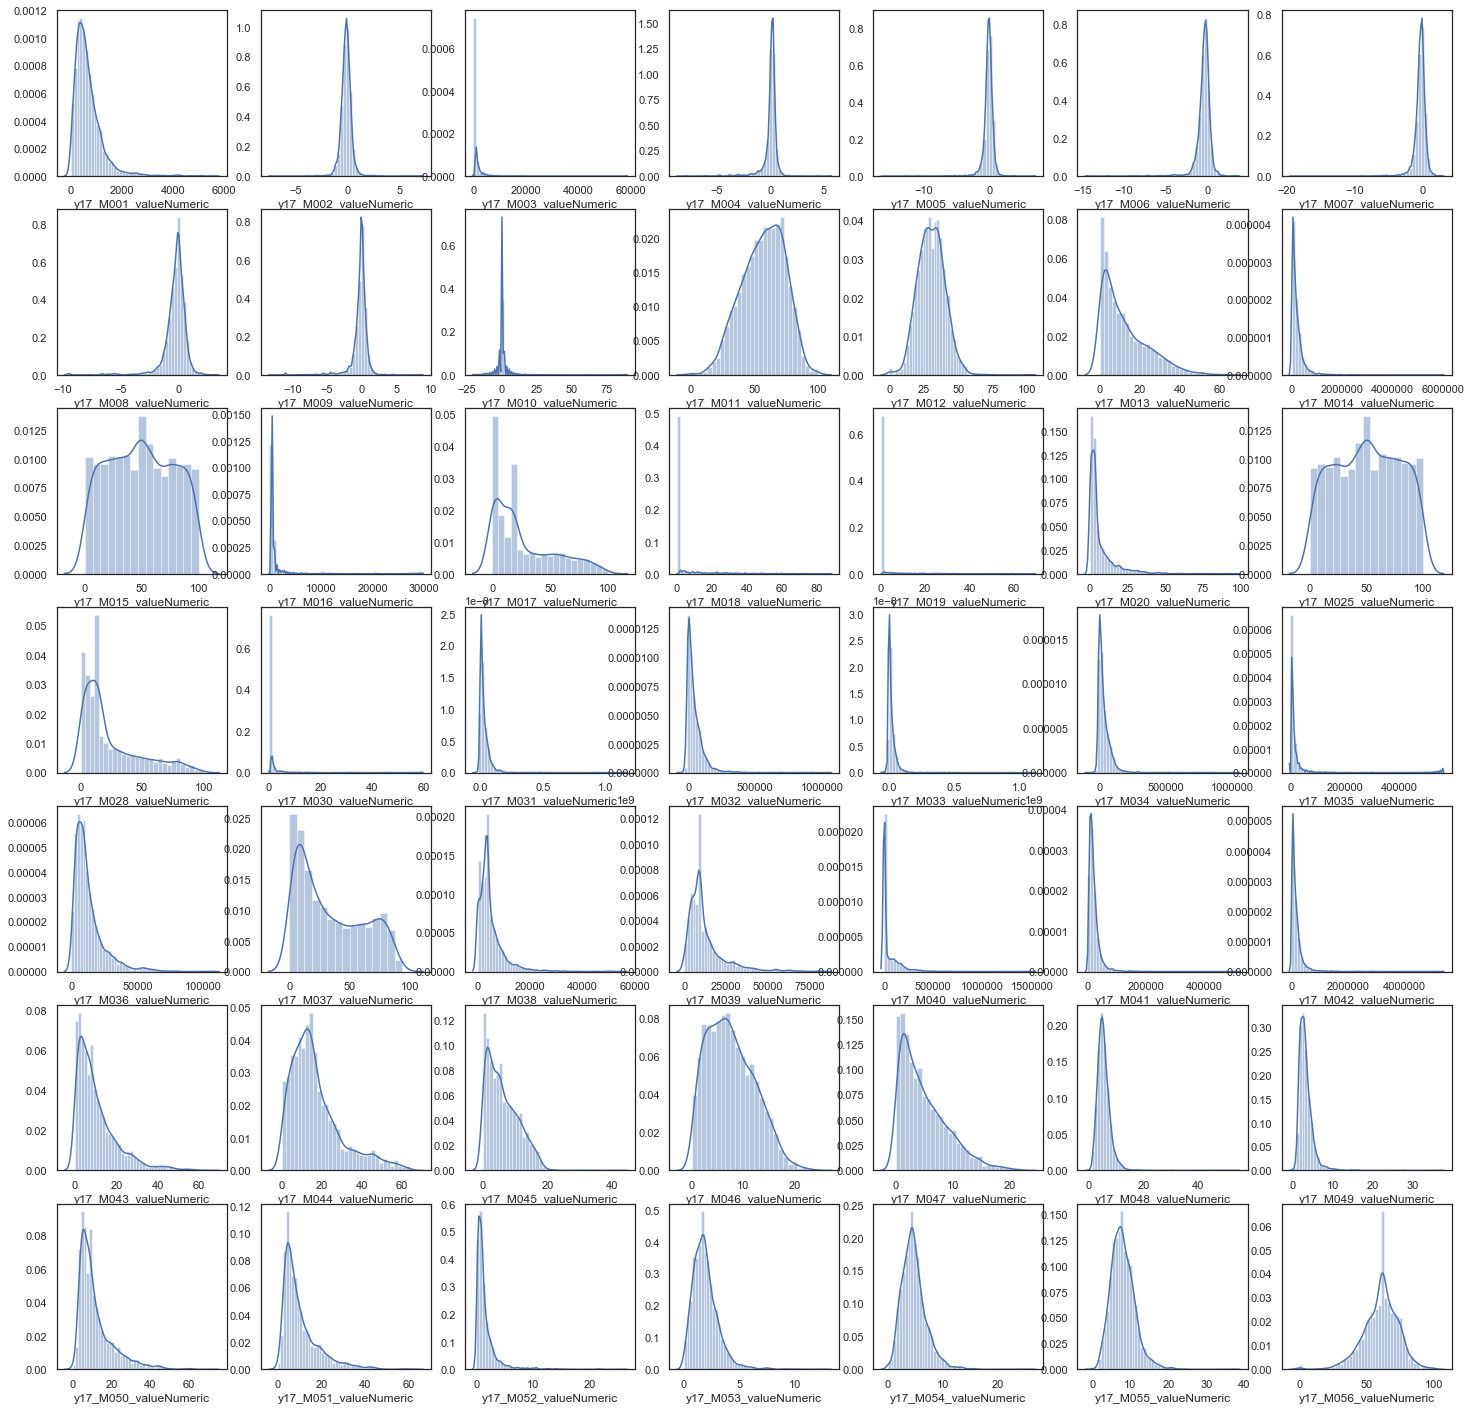

In [568]:
plt.figure(figsize=(25,25))
for i in range(0,49):
    plt.subplot(7, 7, i+1)
    sns.distplot(my_data[my_data.columns[i]])

plt.show()

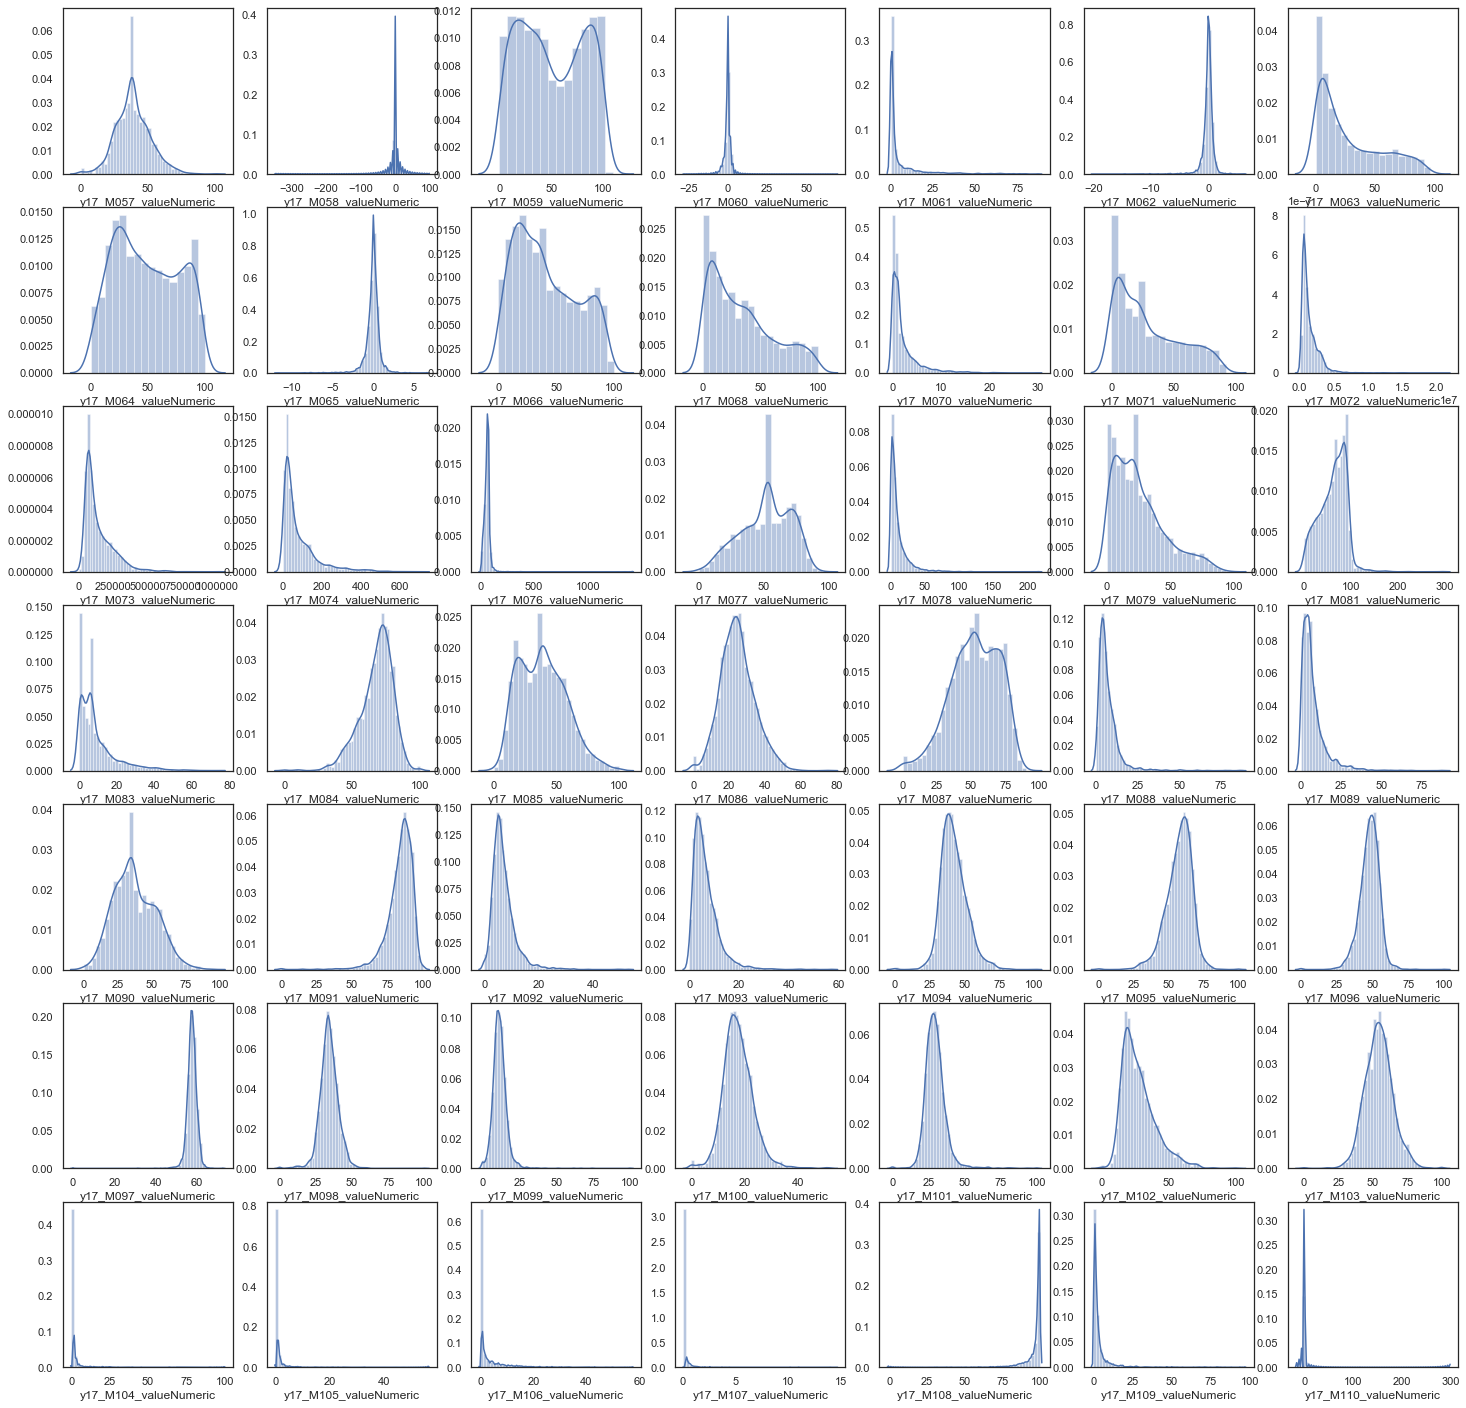

In [569]:
plt.figure(figsize=(25,25))
for i in range(49,98):
    plt.subplot(7, 7, i-48)
    sns.distplot(my_data[my_data.columns[i]])

plt.show()

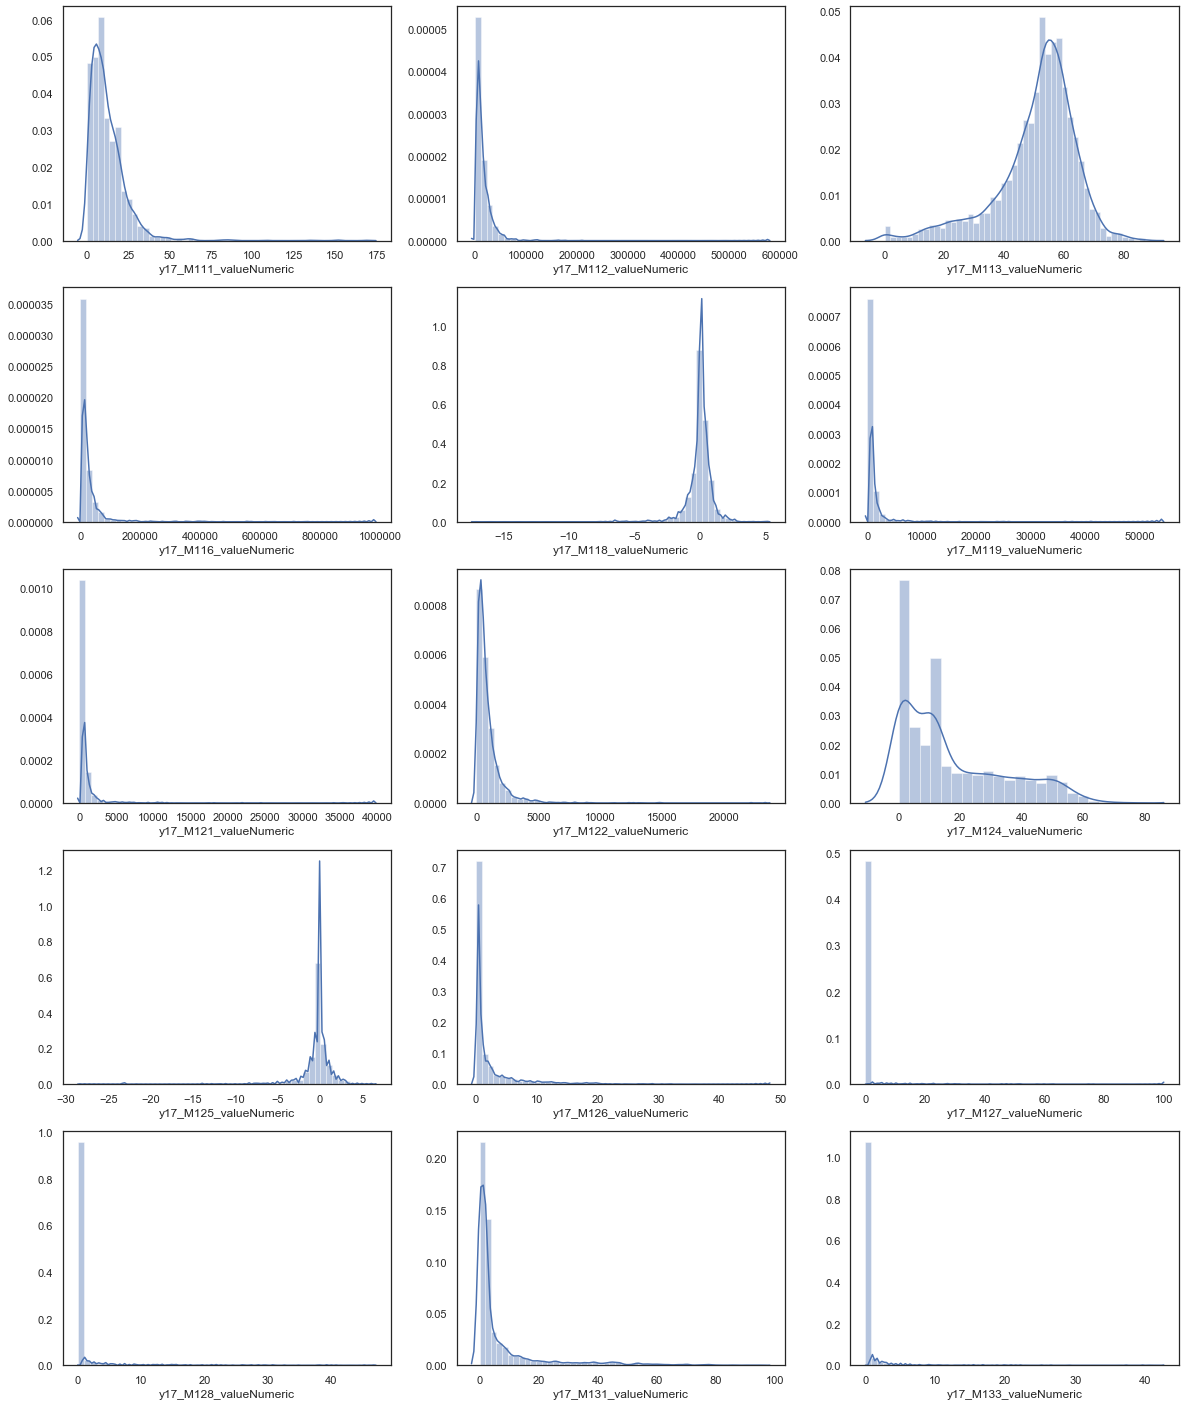

In [570]:
plt.figure(figsize=(20,25))
for i in range(98,113):
    plt.subplot(5, 3, i-97)
    sns.distplot(my_data[my_data.columns[i]])
plt.show()

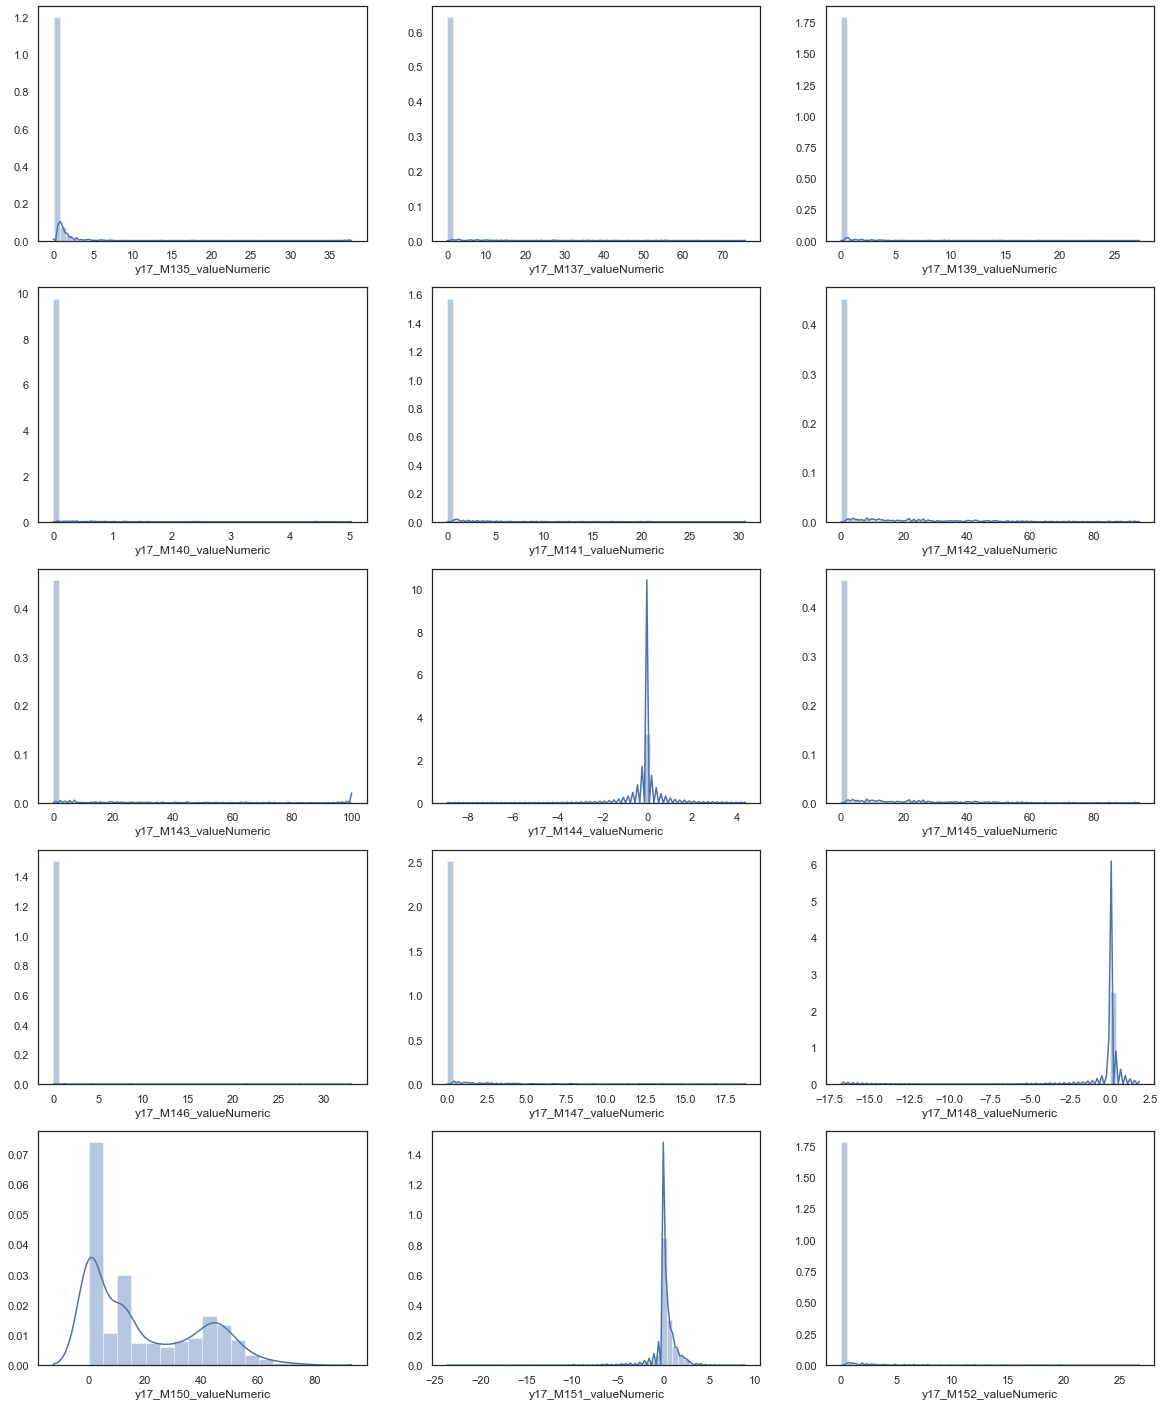

In [571]:
plt.figure(figsize=(20,25))
for i in range(113,128):
    plt.subplot(5, 3, i-112)
    sns.distplot(my_data[my_data.columns[i]])
plt.show()

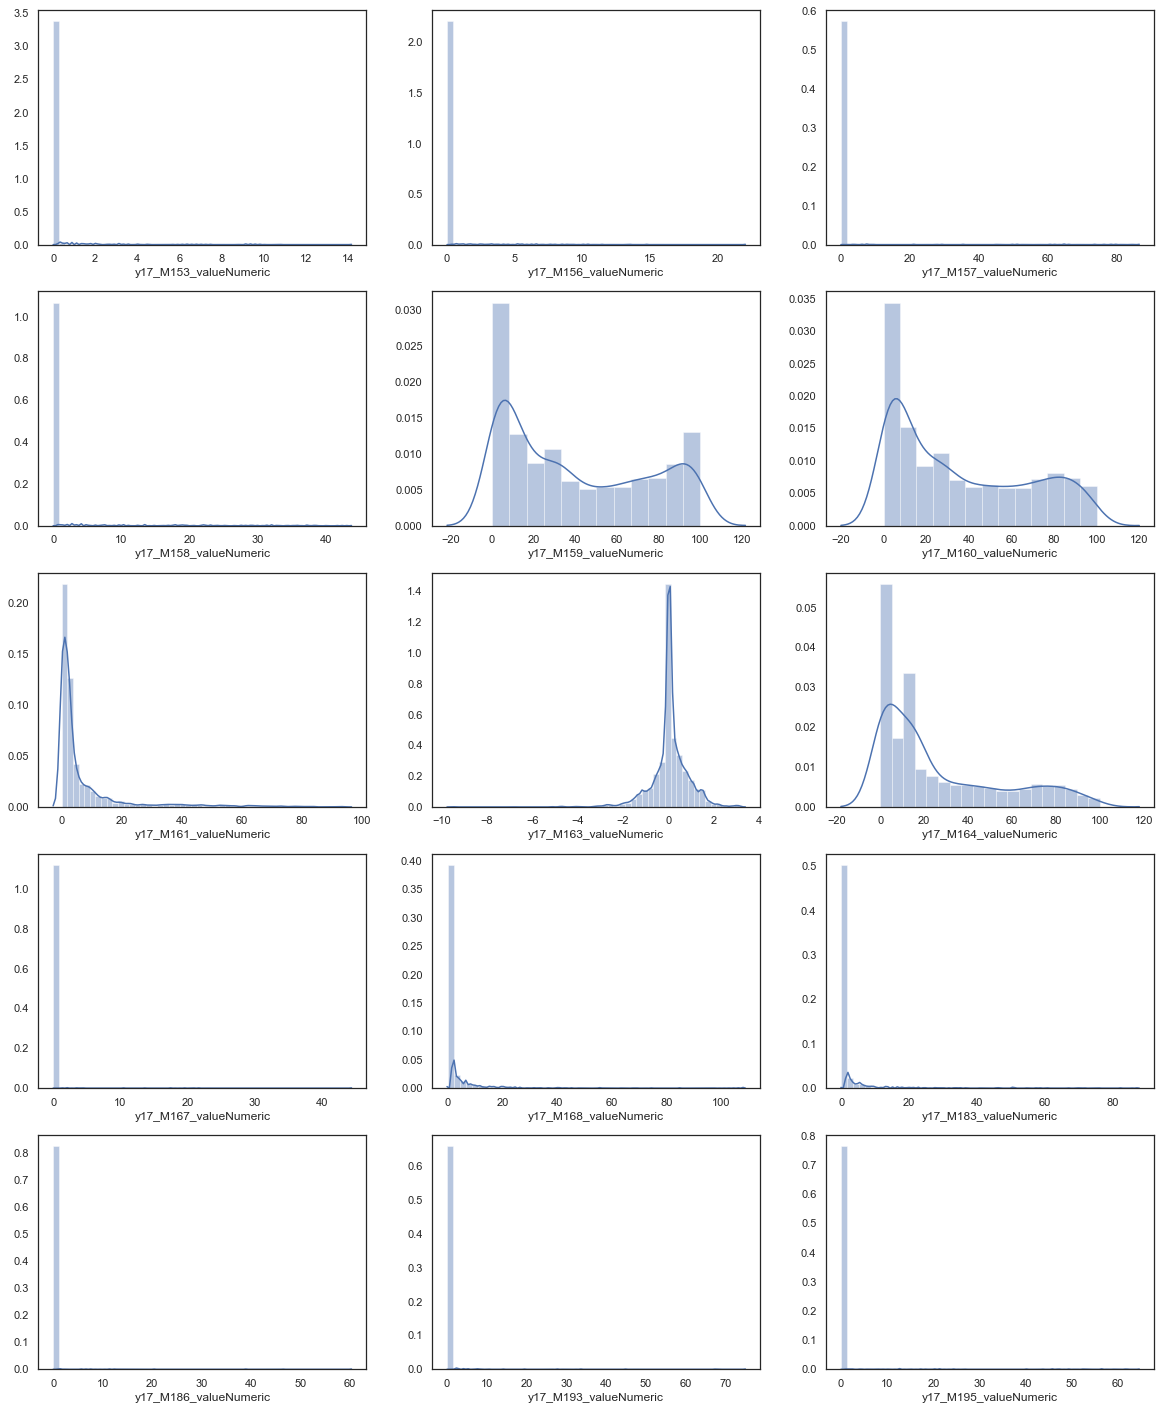

In [573]:
plt.figure(figsize=(20,25))
for i in range(128,143):
    plt.subplot(5, 3, i-127)
    sns.distplot(my_data[my_data.columns[i]])
plt.show()


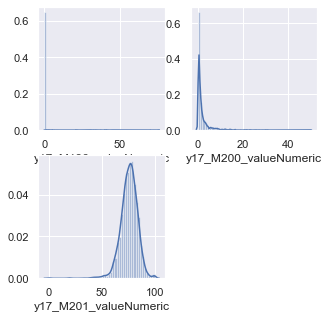

In [6]:
plt.figure(figsize=(5,5))

plt.subplot(2,2, 1)
sns.distplot(my_data[my_data.columns[143]])
plt.subplot(2,2, 2)
sns.distplot(my_data[my_data.columns[144]])
plt.subplot(2,2, 3)
sns.distplot(my_data[my_data.columns[145]])
plt.show()

# Outliers

## y17_M001_valueNumeric

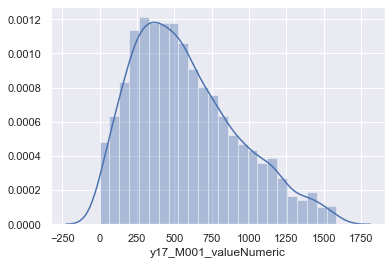

In [63]:
q=my_data['y17_M001_valueNumeric'].quantile(0.95)
data1=my_data[my_data['y17_M001_valueNumeric']<q]
sns.distplot(data1['y17_M001_valueNumeric'])

## y17_M053

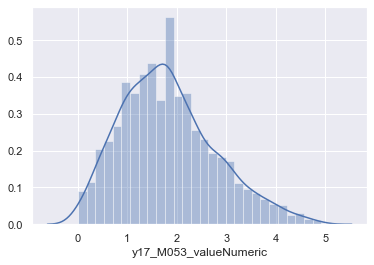

In [64]:
q1=data1['y17_M053_valueNumeric'].quantile(0.98)
data2=data1[data1['y17_M053_valueNumeric']<q1]

sns.distplot(data2['y17_M053_valueNumeric'])

## y17_M054_valueNumeric

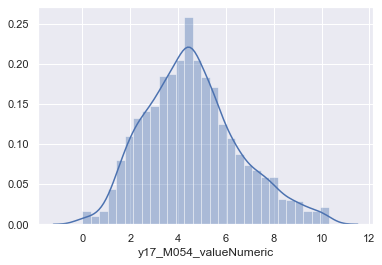

In [65]:
q2=data2['y17_M054_valueNumeric'].quantile(0.98)
data3=data2[data2['y17_M054_valueNumeric']<q2]
sns.distplot(data3['y17_M054_valueNumeric'])

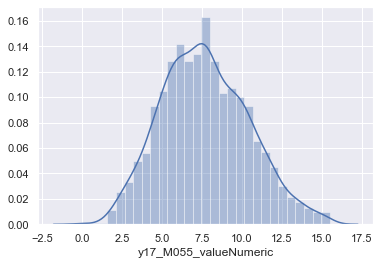

In [66]:
q3=data3['y17_M055_valueNumeric'].quantile(0.98)
data4=data3[data3['y17_M055_valueNumeric']<q3]
sns.distplot(data4['y17_M055_valueNumeric'])

## y17_M056_valueNumeric'

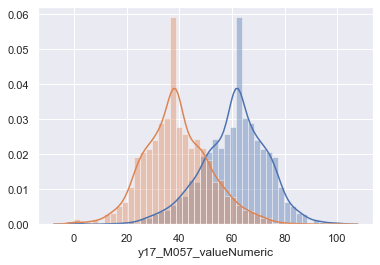

In [67]:
sns.distplot(data4['y17_M056_valueNumeric']) 
sns.distplot(data4['y17_M057_valueNumeric'])

## y17_M084_valueNumeric

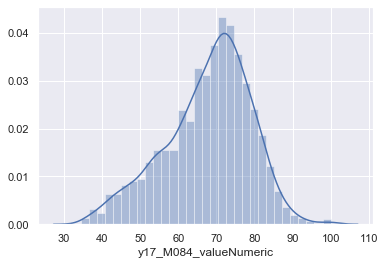

In [68]:
q4=data4['y17_M084_valueNumeric'].quantile(0.01)
data5=data4[data4['y17_M084_valueNumeric']>q4]
sns.distplot(data5['y17_M084_valueNumeric'])

## y17_M089_valueNumeric

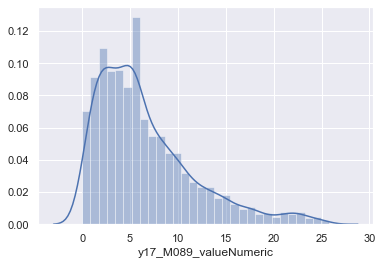

In [69]:
q5=data5['y17_M089_valueNumeric'].quantile(0.97)
data6=data5[data5['y17_M089_valueNumeric']<q5]
sns.distplot(data6['y17_M089_valueNumeric'])

## y17_M088_valueNumeric

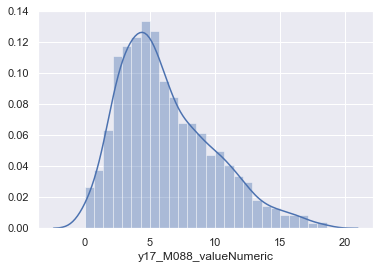

In [70]:
q6=data6['y17_M088_valueNumeric'].quantile(0.98)
data7=data6[data6['y17_M088_valueNumeric']<q6]
sns.distplot(data7['y17_M088_valueNumeric'])


## y17_M091_valueNumeric'

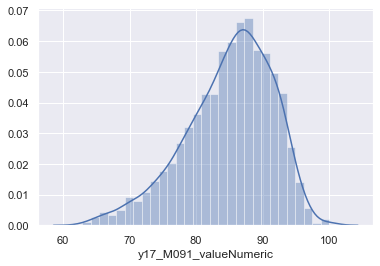

In [71]:
q7=data7['y17_M091_valueNumeric'].quantile(0.01)
data8=data7[data7['y17_M091_valueNumeric']>q7]
sns.distplot(data8['y17_M091_valueNumeric'])

## y17_M093_valueNumeric

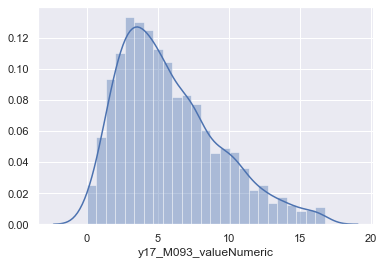

In [72]:
q8=data8['y17_M093_valueNumeric'].quantile(0.98)
data9=data8[data8['y17_M093_valueNumeric']<q8]
sns.distplot(data9['y17_M093_valueNumeric'])

## y17_M099_valueNumeric

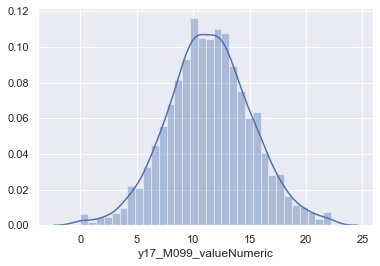

In [73]:
q9=data9['y17_M099_valueNumeric'].quantile(0.99)
data10=data9[data9['y17_M099_valueNumeric']<q9]
sns.distplot(data10['y17_M099_valueNumeric'])

## y17_M110_valueNumeric

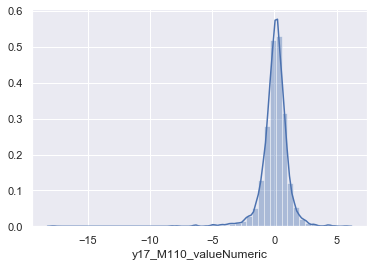

In [74]:
q10=data10['y17_M110_valueNumeric'].quantile(0.99999)
data11=data10[data10['y17_M110_valueNumeric']<q10]
sns.distplot(data11['y17_M110_valueNumeric'])

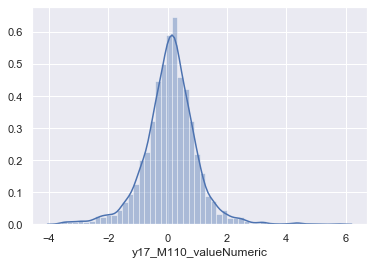

In [75]:
q11=data11['y17_M110_valueNumeric'].quantile(0.01)
data12=data11[data11['y17_M110_valueNumeric']>q11]
sns.distplot(data12['y17_M110_valueNumeric'])

## 'y17_M118_valueNumeric'

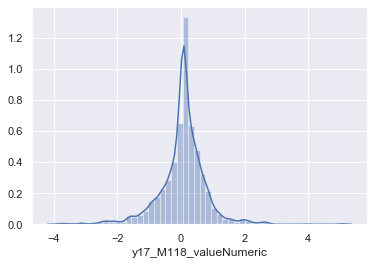

In [76]:
q12=data12['y17_M118_valueNumeric'].quantile(0.01)
data13=data12[data12['y17_M118_valueNumeric']>q12]

sns.distplot(data13['y17_M118_valueNumeric'])

## y17_M144_valueNumeric

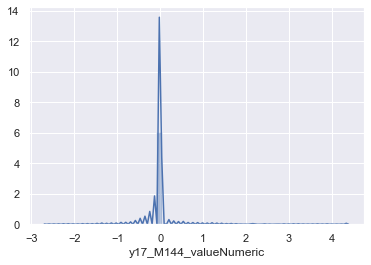

In [77]:
q13=data13['y17_M144_valueNumeric'].quantile(0.01)
data14=data13[data13['y17_M144_valueNumeric']>q13]

sns.distplot(data14['y17_M144_valueNumeric'])

## y17_M151_valueNumeric

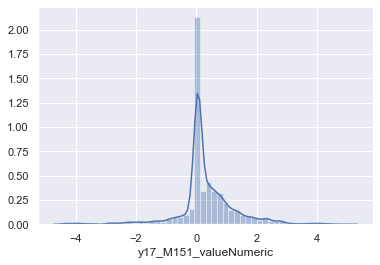

In [78]:
q14=data14['y17_M151_valueNumeric'].quantile(0.01)
data15=data14[data14['y17_M151_valueNumeric']>q14]
sns.distplot(data15['y17_M151_valueNumeric'])

## y17_M163_valueNumeric

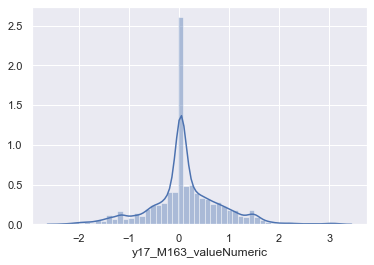

In [79]:
q15=data15['y17_M163_valueNumeric'].quantile(0.01)
data16=data15[data15['y17_M163_valueNumeric']>q15]
sns.distplot(data16['y17_M163_valueNumeric'])


## y17_M041_valueNumeric

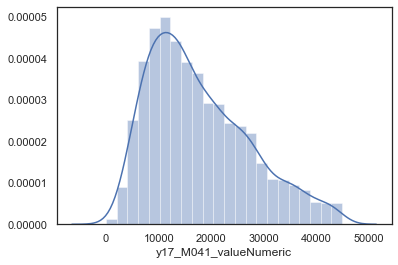

In [121]:
q16=data16['y17_M041_valueNumeric'].quantile(0.95)
data17=data16[data16['y17_M041_valueNumeric']<q16]
sns.distplot(data17['y17_M041_valueNumeric'])

# Reset column names

In [122]:
# rearrage it a little bit 

col_name=data17.columns.sort_values()
col_name
#Variable_Lookup['MapTitle']

Index(['region', 'y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric',
       ...
       'y17_M164_valueNumeric', 'y17_M167_valueNumeric',
       'y17_M168_valueNumeric', 'y17_M183_valueNumeric',
       'y17_M186_valueNumeric', 'y17_M193_valueNumeric',
       'y17_M195_valueNumeric', 'y17_M196_valueNumeric',
       'y17_M200_valueNumeric', 'y17_M201_valueNumeric'],
      dtype='object', name='index', length=147)

In [123]:
vl=Variable_Lookup.sort_values(by='MapID').reset_index().drop(columns='index')
vl.head()

MapID Category    Subcategory  \
0  y17_M001    Farms          Farms   
1  y17_M002    Farms          Farms   
2  y17_M003    Farms  Farms by Size   
3  y17_M004    Farms  Farms by Size   
4  y17_M005    Farms  Farms by Size   

                                            MapTitle  
0                              Number of Farms: 2017  
1            Change in Number of Farms: 2012 to 2017  
2               Average Size of Farms in Acres: 2017  
3  Change in Number of Farms with Less Than 10 Ac...  
4  Change in Number of Farms with 10 to 49 Acres:...

In [124]:
list_names=[]
for i in range(len(vl)):
    for j in col_name:
        if  vl['MapID'][i] in j:
            list_names.append(vl['MapTitle'][i])

list_names.append('region')
list_names

['Number of Farms: 2017',
 'Change in Number of Farms: 2012 to 2017',
 'Average Size of Farms in Acres: 2017',
 'Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
 'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
 'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
 'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
 'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
 'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
 'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017',
 'Percent of Farms with Sales of Less Than $10,000: 2017',
 'Percent of Farms with Sales of $10,000 to $249,999: 2017',
 'Percent of Farms with Sales of $250,000 or More: 2017',
 'Average Value of Agricultural Products Sold per Farm: 2017',
 'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
 'Value of Grains,

In [127]:
len(data17.columns),len(list_names)

(147, 147)

In [128]:
data17.columns[:10]

Index(['y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric', 'y17_M010_valueNumeric'],
      dtype='object', name='index')

In [129]:
data17.columns=list_names
data17.head()

Number of Farms: 2017  Change in Number of Farms: 2012 to 2017  \
0                    371                                    -0.17   
1                    842                                    -0.59   
2                    498                                    -0.50   
3                    205                                     0.27   
4                   1146                                    -0.28   

   Average Size of Farms in Acres: 2017  \
0                                 305.0   
1                                 208.0   
2                                 307.0   
3                                 273.0   
4                                 129.0   

   Change in Number of Farms with Less Than 10 Acres: 2012 to 2017  \
0                                               0.03                 
1                                               0.01                 
2                                              -0.06                 
3                                               0.44                 
4                                               0.04                 

   Change in Number of Farms with 10 to 49 Acres: 2012 to 2017  \
0                                              -0.16             
1                                              -0.47             
2                                               0.56             
3                                              -0.05             
4                                              -0.22             

   Change in Number of Farms with 50 to 179 Acres: 2012 to 2017  \
0                                              -0.13              
1                                              -1.05              
2                                              -0.69              
3                                              -0.25              
4                                              -0.54              

   Change in Number of Farms with 180 to 499 Acres: 2012 to 2017  \
0                                              -0.21               
1                                              -0.79               
2                                              -0.63               
3                                               0.54               
4                                               0.23               

   Change in Number of Farms with 500 to 999 Acres: 2012 to 2017  \
0                                               0.05               
1                                               0.36               
2                                              -0.38               
3                                              -1.38               
4                                              -0.12               

   Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017  \
0                                               0.00                   
1                                               0.44                   
2                                               0.23                   
3                                              -0.23                   
4                                               0.42                   

   Change in Number of Farms with 2,000 Acres or More: 2012 to 2017  ...  \
0                                              -0.27                 ...   
1                                              -0.46                 ...   
2                                              -1.02                 ...   
3                                               1.47                 ...   
4                                              -0.62                 ...   

   Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017  \
0                                                0.0                                 
1                                                0.0                                 
2                                                0.0                                 
3                                                0.0    

In [130]:
data17['Total Income from Farm-Related Sources, Average per Farm: 2017']

0       20586.0
1       13758.0
2       12182.0
3       14584.0
4        7065.0
         ...   
3073    26718.0
3074    27047.0
3076    15299.0
3077    25735.0
3078    15223.0
Name: Total Income from Farm-Related Sources, Average per Farm: 2017, Length: 2239, dtype: float64

# Liearity

In [135]:
dependent_var='Total Income from Farm-Related Sources, Average per Farm: 2017'

In [136]:
depen_var=[]
for i in data17[dependent_var]:
    if i==min(data17[dependent_var]):
        i=1
        depen_var.append(i)
    else:
        depen_var.append(i)
depen_var[:5]   

[20586.0, 13758.0, 12182.0, 14584.0, 7065.0]

In [138]:
data17[dependent_var]=depen_var

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
min(data17[dependent_var])

1.0

In [140]:
cleaned_data1=data17.copy()
cleaned_data1.head(3)

Number of Farms: 2017  Change in Number of Farms: 2012 to 2017  \
0                    371                                    -0.17   
1                    842                                    -0.59   
2                    498                                    -0.50   

   Average Size of Farms in Acres: 2017  \
0                                 305.0   
1                                 208.0   
2                                 307.0   

   Change in Number of Farms with Less Than 10 Acres: 2012 to 2017  \
0                                               0.03                 
1                                               0.01                 
2                                              -0.06                 

   Change in Number of Farms with 10 to 49 Acres: 2012 to 2017  \
0                                              -0.16             
1                                              -0.47             
2                                               0.56             

   Change in Number of Farms with 50 to 179 Acres: 2012 to 2017  \
0                                              -0.13              
1                                              -1.05              
2                                              -0.69              

   Change in Number of Farms with 180 to 499 Acres: 2012 to 2017  \
0                                              -0.21               
1                                              -0.79               
2                                              -0.63               

   Change in Number of Farms with 500 to 999 Acres: 2012 to 2017  \
0                                               0.05               
1                                               0.36               
2                                              -0.38               

   Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017  \
0                                               0.00                   
1                                               0.44                   
2                                               0.23                   

   Change in Number of Farms with 2,000 Acres or More: 2012 to 2017  ...  \
0                                              -0.27                 ...   
1                                              -0.46                 ...   
2                                              -1.02                 ...   

   Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017  \
0                                                0.0                                 
1                                                0.0                                 
2                                                0.0                                 

   Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017  \
0                                               4.38                             
1                                               1.75                             
2                                               0.24                             

   Acres of Land in Orchards as Percent of Cropland Acreage: 2017  \
0                                               0.72                
1                                               2.01                
2                                               1.38                

   Total Acres of Avocados, as Percent of Land in Orchards: 2017  \
0                                                0.0               
1                                                0.0               
2                                                0.0               

   Total Acres of Grapefruit, as Percent of Land in Orchards: 2017  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 

   Total Acres of Valencia Oranges, as Percent of Land in Orchards: 2017  \
0                

# If python breaks, we can rerun from here

In [143]:
#save the output locally
# pickle_out_2=open('cleaned_data1', 'wb')
# pickle.dump(cleaned_data1, pickle_out_2)
# pickle_out_2.close()

pickle_in_data = open("cleaned_data1","rb")
Cleaned_data1 = pickle.load(pickle_in_data)

In [144]:
cleaned_data1=Cleaned_data1.reset_index().drop(columns='index')

In [145]:
target=cleaned_data1['Total Income from Farm-Related Sources, Average per Farm: 2017']
Inputs=cleaned_data1.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

In [146]:
len(Inputs.columns)

146

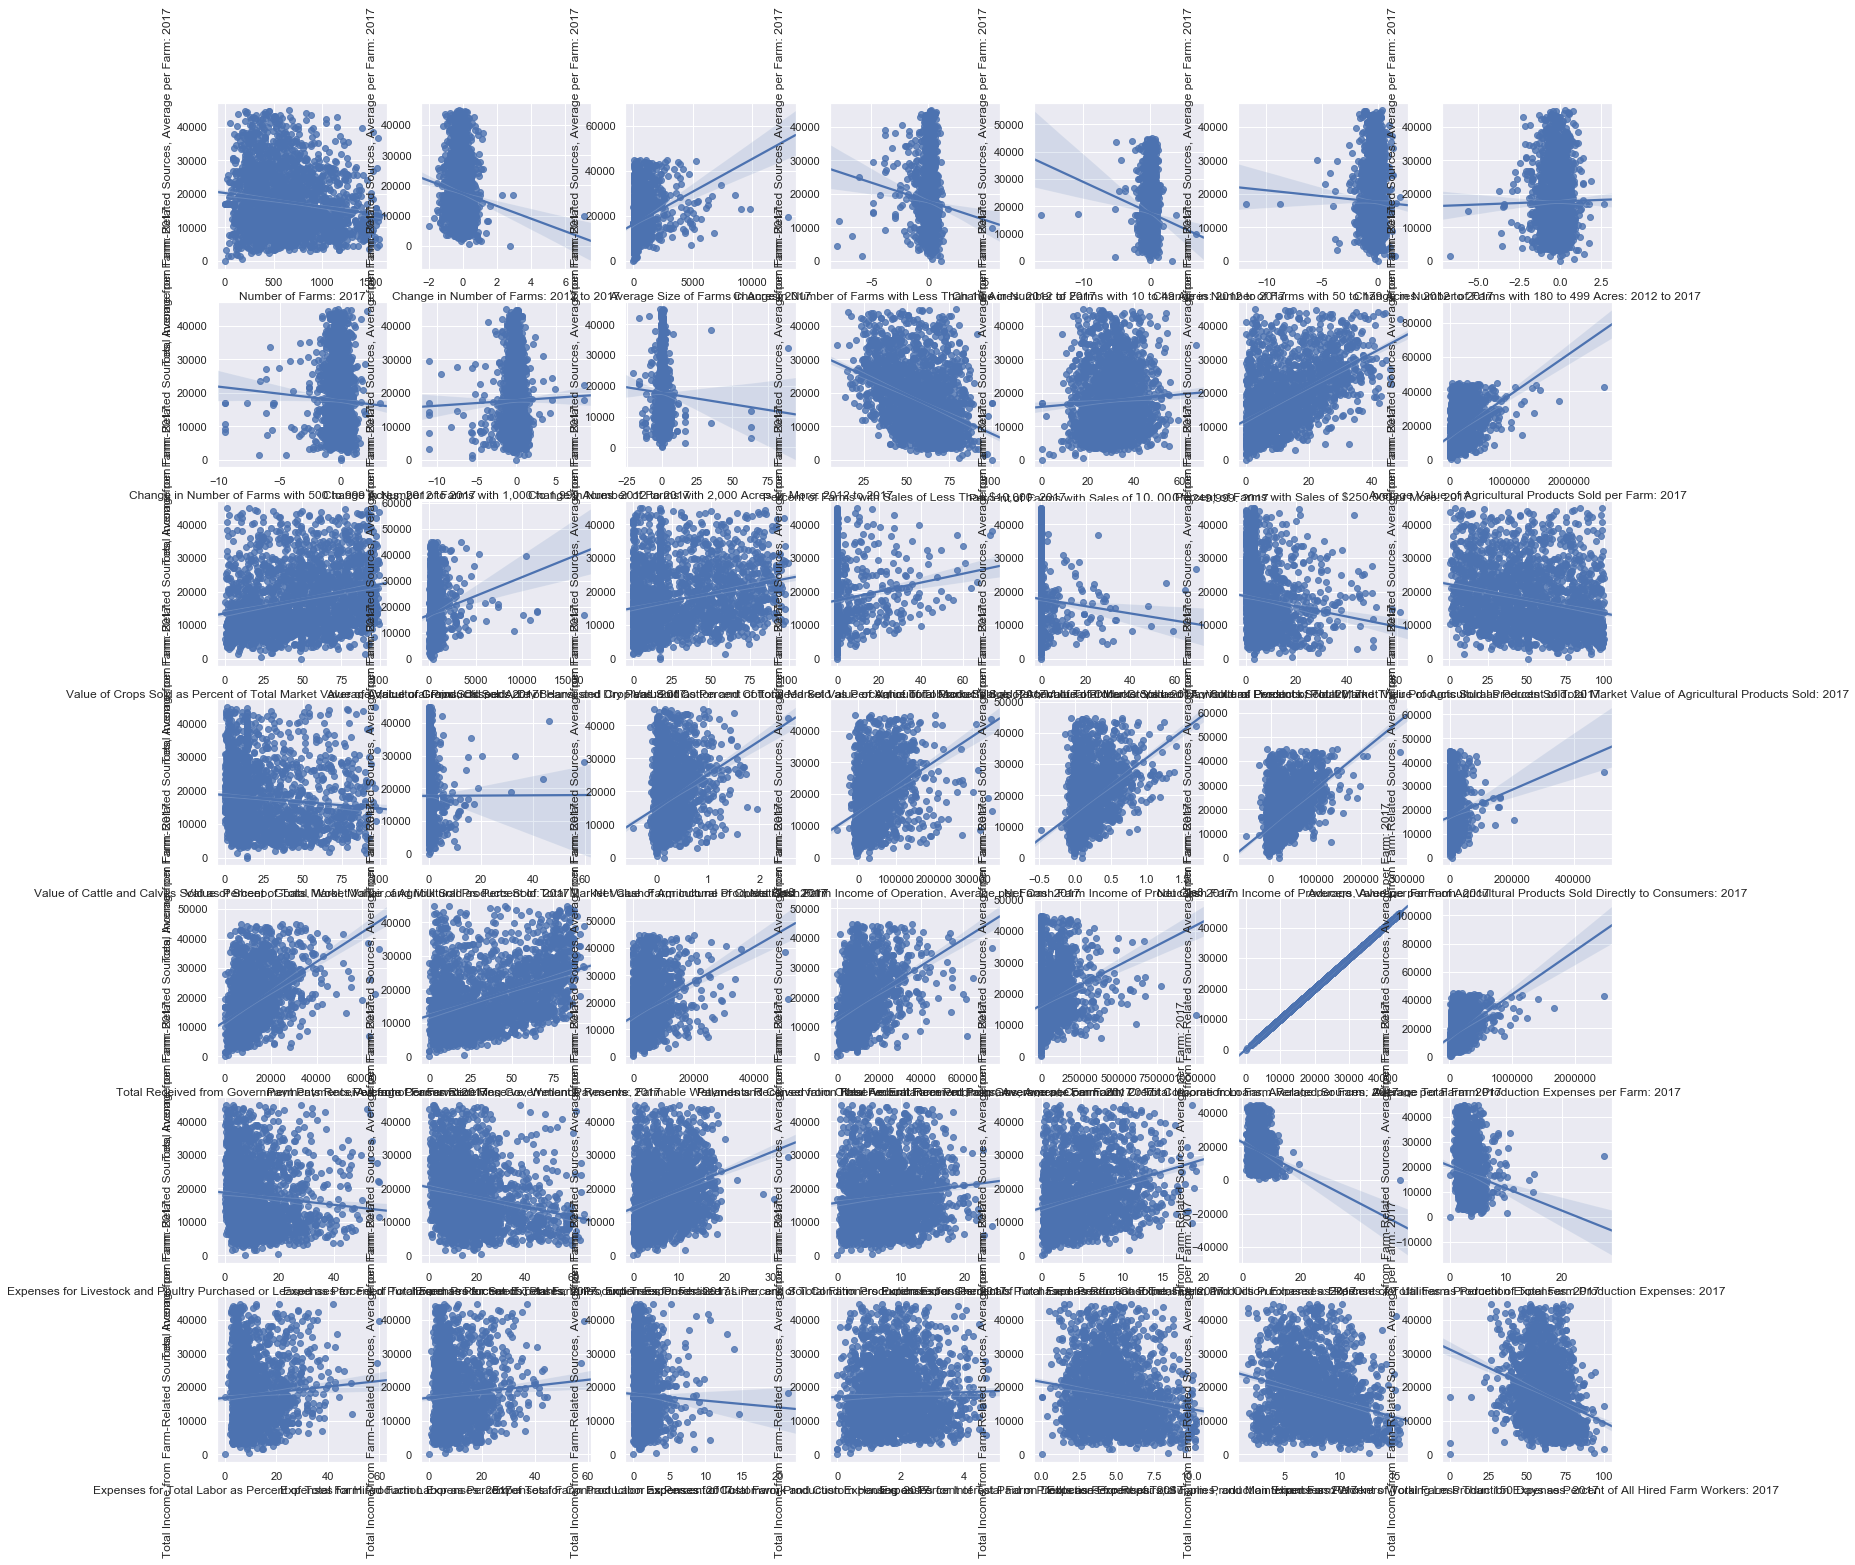

In [6]:
plt.figure(figsize=(25,25))
for i in range(0,49):
    plt.subplot(7, 7, i+1)
    sns.regplot(cleaned_data1[cleaned_data1.columns[i]],target)

plt.show()

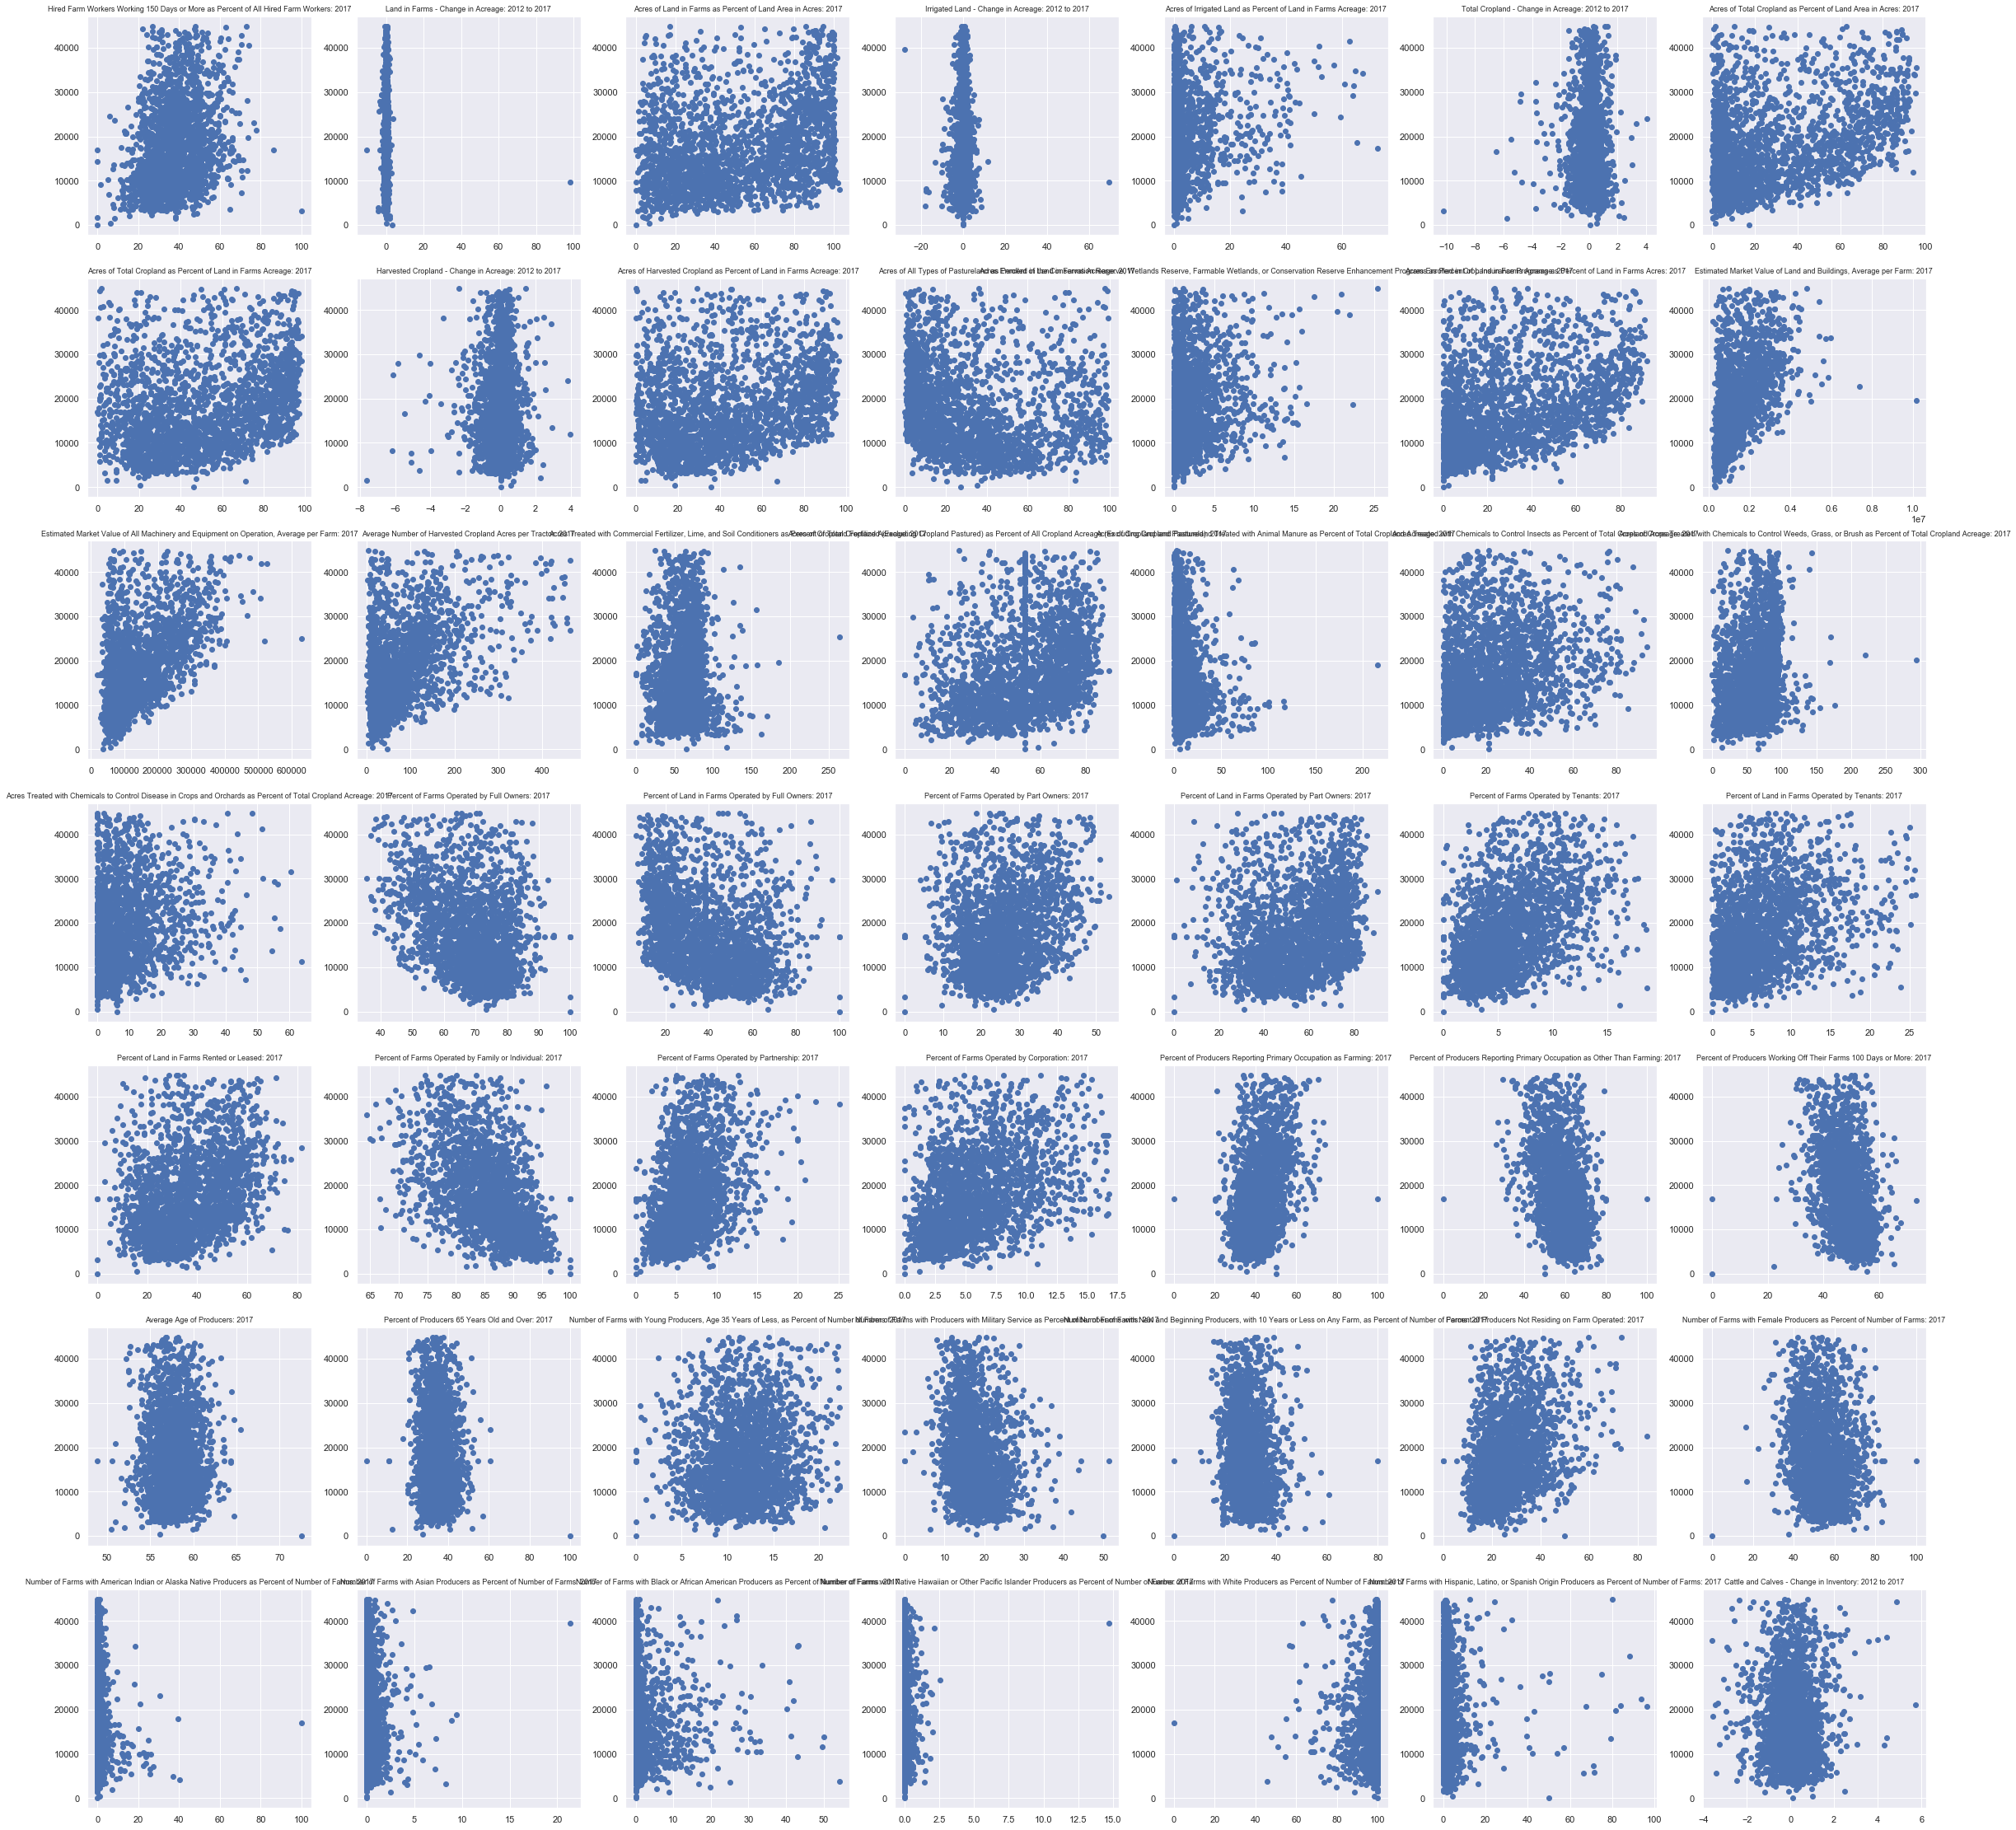

In [7]:
plt.figure(figsize=(40,40))
for i in range(49,98):
    plt.subplot(7, 7, i-48)
    plt.scatter(cleaned_data1[cleaned_data1.columns[i]],target)
    plt.title(cleaned_data1.columns[i],fontsize=9)
plt.show()

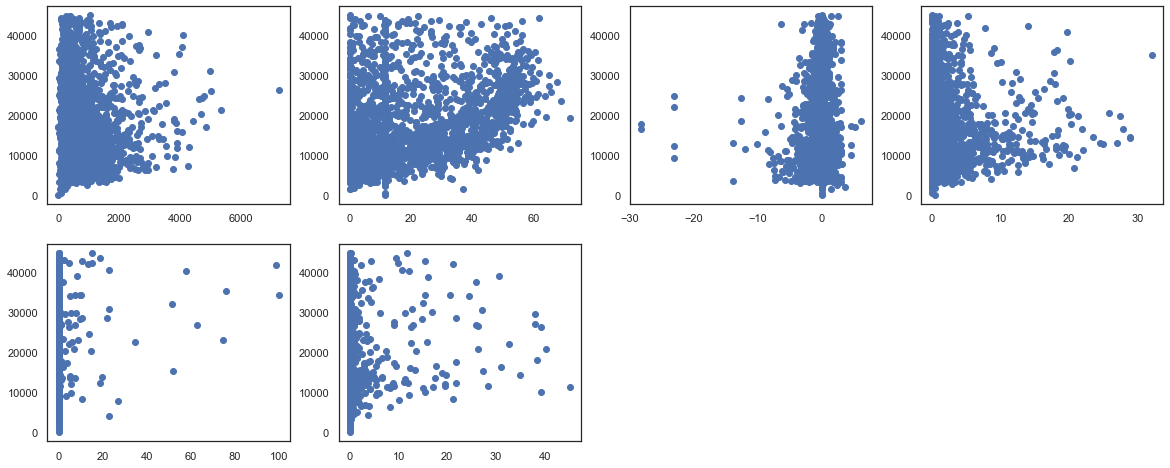

In [254]:
plt.figure(figsize=(20,8))
for i in range(98,104):
    plt.subplot(2, 4, i-97)
    plt.scatter(cleaned_data1[cleaned_data1.columns[i]],target)
plt.show()

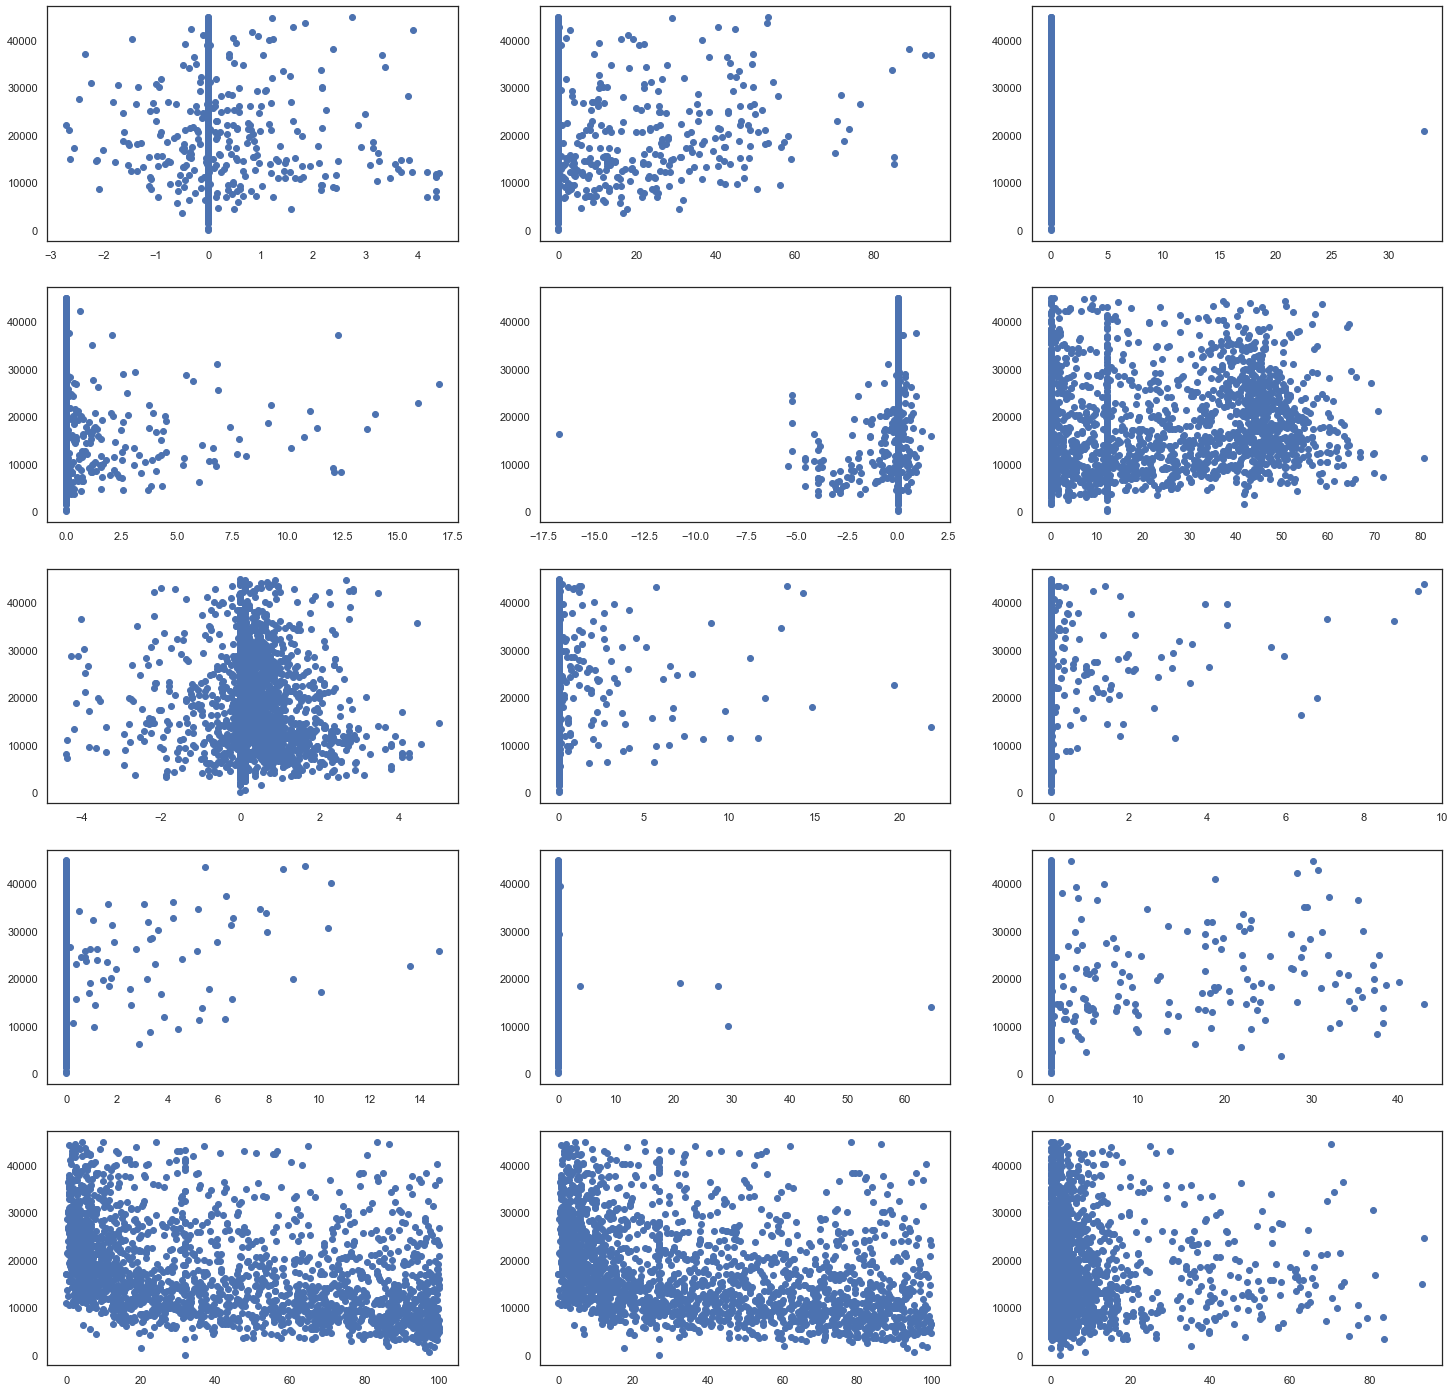

In [255]:
plt.figure(figsize=(25,25))
for i in range(113,128):
    plt.subplot(5, 3, i-112)
    plt.scatter(cleaned_data1[cleaned_data1.columns[i]],target)
plt.show()

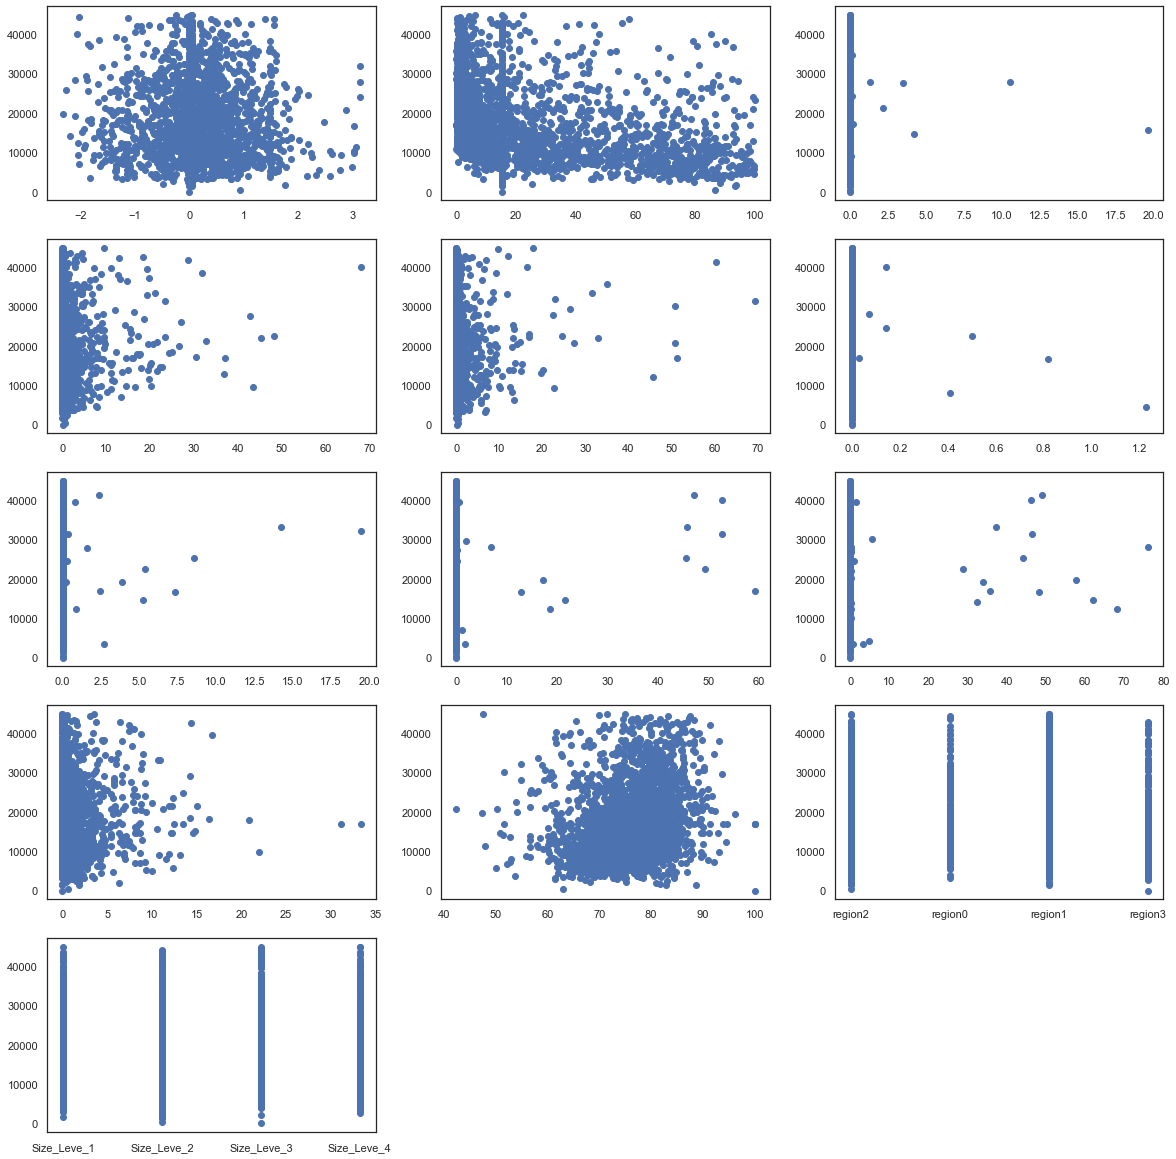

In [259]:
plt.figure(figsize=(20,25))
for i in range(128,141):
    plt.subplot(6, 3, i-127)
    plt.scatter(cleaned_data1[cleaned_data1.columns[i]],target)
plt.show()

In [9]:
len(cleaned_data1.columns)

146

# Add Fram size  columns


In [147]:
cleaned_data1.columns[2]

'Average Size of Farms in Acres: 2017'

In [148]:
# Get the different quantile values of farm size
cleaned_data1[cleaned_data1.columns[2]].describe()


count     2239.000000
mean       534.103618
std        882.936523
min          1.000000
25%        163.000000
50%        269.000000
75%        471.000000
max      12967.000000
Name: Average Size of Farms in Acres: 2017, dtype: float64

In [149]:
# create an empty list
size_dum=[]


for i in list(cleaned_data1[cleaned_data1.columns[2]].sort_values()):
    if i <=163:
        i="Size_Leve_1"
        size_dum.append(i)
    elif i>163 and i<=269:
        i="Size_Leve_2"
        size_dum.append(i)
    elif i>269 and i<=471:
        i="Size_Leve_3"
        size_dum.append(i)
    else:
        i="Size_Leve_4"
        size_dum.append(i)


In [150]:
# double check the size_dum list 
pd.DataFrame(size_dum)[0].value_counts()

Size_Leve_2    564
Size_Leve_1    561
Size_Leve_4    559
Size_Leve_3    555
Name: 0, dtype: int64

In [151]:
# Add new column 
cleaned_data1['farm_size']=size_dum

In [152]:
acres_categories_list = ['Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017']
if acres_categories_list[0] in cleaned_data1.columns:
    cleaned_data1.drop(columns = acres_categories_list, axis = 1, inplace=True)

In [153]:
cleaned_data1.columns

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Percent of Farms with Sales of Less Than $10,000: 2017',
       'Percent of Farms with Sales of $10,000 to $249,999: 2017',
       'Percent of Farms with Sales of $250,000 or More: 2017',
       'Average Value of Agricultural Products Sold per Farm: 2017',
       'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
       'Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
       'Value of Grains, Oilseeds, Dry Beans, and Dry Peas Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
       ...
       'Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Land in Orchards as Percent of Cropland Acreage: 2017',
       'Total Acres of Avocados, as Percent of Land in Orchards: 2017',
       'Total Acres of Grapefruit, as Percent of Land in Orcha

In [154]:
cleaned_data1['farm_size']

0       Size_Leve_1
1       Size_Leve_1
2       Size_Leve_1
3       Size_Leve_1
4       Size_Leve_1
           ...     
2234    Size_Leve_4
2235    Size_Leve_4
2236    Size_Leve_4
2237    Size_Leve_4
2238    Size_Leve_4
Name: farm_size, Length: 2239, dtype: object

In [155]:
cleaned_data_with_dum=pd.get_dummies(cleaned_data1,drop_first=True)
cleaned_data_with_dum.head()

Number of Farms: 2017  Change in Number of Farms: 2012 to 2017  \
0                    371                                    -0.17   
1                    842                                    -0.59   
2                    498                                    -0.50   
3                    205                                     0.27   
4                   1146                                    -0.28   

   Average Size of Farms in Acres: 2017  \
0                                 305.0   
1                                 208.0   
2                                 307.0   
3                                 273.0   
4                                 129.0   

   Percent of Farms with Sales of Less Than $10,000: 2017  \
0                                              57.68        
1                                              60.57        
2                                              64.26        
3                                              72.68        
4                                              60.82        

   Percent of Farms with Sales of $10,000 to $249,999: 2017  \
0                                              38.27          
1                                              28.86          
2                                              26.31          
3                                              25.85          
4                                              25.13          

   Percent of Farms with Sales of $250,000 or More: 2017  \
0                                               4.04       
1                                              10.57       
2                                               9.44       
3                                               1.46       
4                                              14.05       

   Average Value of Agricultural Products Sold per Farm: 2017  \
0                                            57844.0            
1                                           142972.0            
2                                           211977.0            
3                                            20484.0            
4                                           211916.0            

   Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017  \
0                                              58.41                                          
1                                              84.41                                          
2                                              11.46                                          
3                                              53.48                                          
4                                               5.45                                          

   Average Value of Crops Sold per Acre of Harvested Cropland: 2017  \
0                                              455.0                  
1                                             1078.0                  
2                                              479.0                  
3                                              208.0                  
4                                              426.0                  

   Value of Grains, Oilseeds, Dry Beans, and Dry Peas Sold as Percent of Total Market Value of Agricultural Products Sold: 2017  \
0                                               3.92                                                                              
1                                               9.11                                                                              
2                                               1.52                                                                              
3                                              19.42                                                                              
4                                               0.53                                                                              

   ...  Total Acres of Valencia Oranges, as Pe

In [156]:
new_inputs=cleaned_data_with_dum.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

# Scaled data

In [157]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(new_inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(new_inputs)
inputs_scaled

array([[-0.74949049, -0.08890279, -0.25953711, ..., -0.58027271,
        -0.57408401, -0.57683455],
       [ 0.62140438, -1.04033564, -0.36942233, ..., -0.58027271,
        -0.57408401, -0.57683455],
       [-0.37984368, -0.83645718, -0.25727144, ..., -0.58027271,
        -0.57408401, -0.57683455],
       ...,
       [-0.65635113,  1.61008445,  1.24147225, ..., -0.58027271,
        -0.57408401,  1.73359936],
       [-1.11331609,  1.17967435,  0.8506434 , ..., -0.58027271,
        -0.57408401,  1.73359936],
       [-1.11040548, -0.08890279,  5.02288301, ..., -0.58027271,
        -0.57408401,  1.73359936]])

# Train test split

In [158]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)



Training set - Features:  (1791, 144) Target:  (1791,)
Test set- Features:  (448, 144) Target:  (448,)


# Feature Selection

In [159]:
feature_columns=new_inputs.columns

In [160]:
x_train =pd.DataFrame(data=x_train, columns=feature_columns)
x_test =pd.DataFrame(data=x_test, columns=feature_columns)

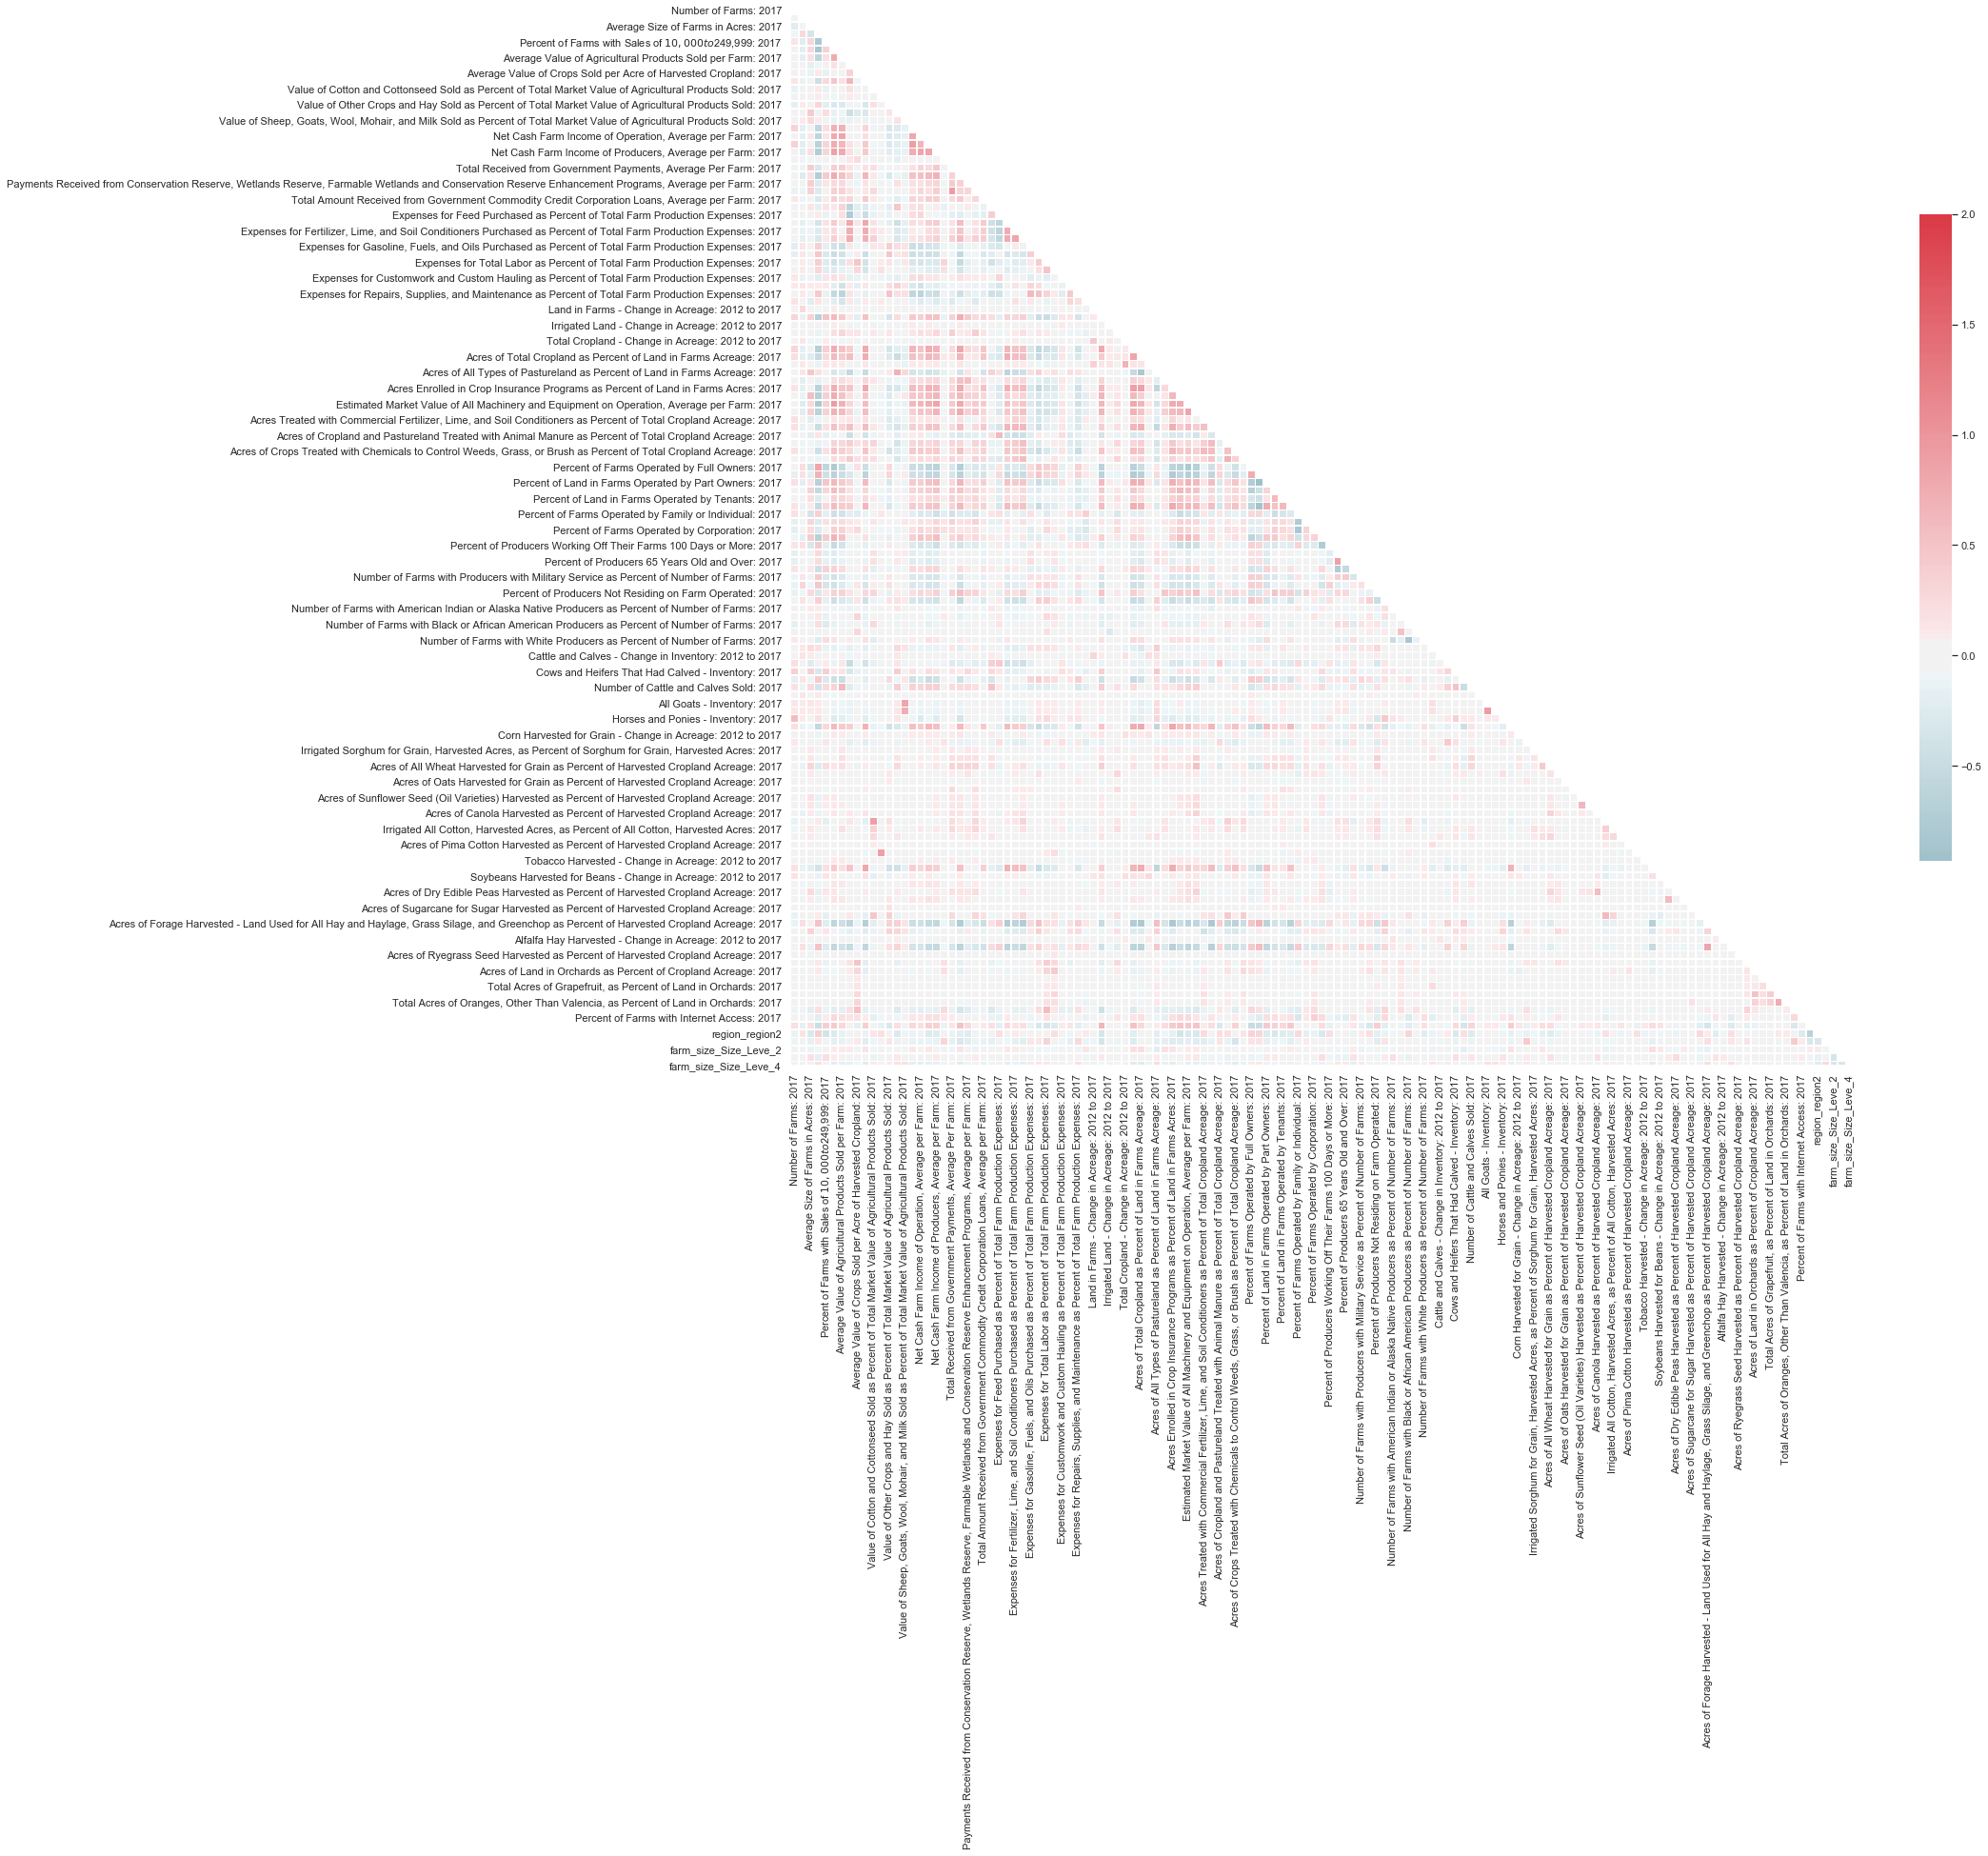

In [163]:

sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [164]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

len(x_train.columns)

135

# Linear Regression

## RMSE

In [165]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Score

In [166]:
test_accuracy = reg.score(x_test, y_test)
train_accuracy=reg.score(x_train, y_train)
print("Linear Regression Train Accuracy: {:2f}%".format(train_accuracy*100))
print("Linear Regression test Accuracy: {:2f}%".format(test_accuracy*100 ))

Linear Regression Train Accuracy: 62.216243%
Linear Regression test Accuracy: 56.825405%


## Residual

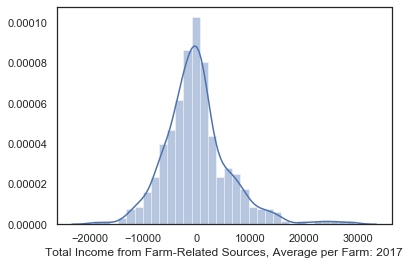

In [167]:
y_test_reg_pred=reg.predict(x_test)
# distribution of residual is 
sns.distplot(y_test-y_test_reg_pred)

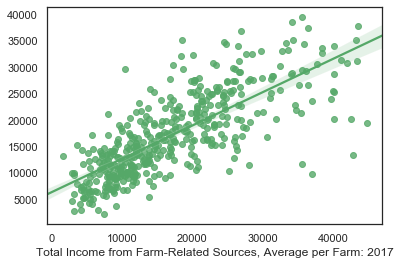

In [168]:
#plt.scatter(y_test,y_test_reg_pred)
sns.regplot(y_test,y_test_reg_pred,color='g')

In [169]:
lr_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_reg_pred)**2)))
lr_rmse

6149.082439975812

# Ridge regression

## Given a list of alphas 

In [306]:
# given a list of alphas 
alphas=[2, 1.6,1.5, 1.49,1.48,1.47,
        1.46,1.47,1.4,1.3,1.2
        ,1.1, 1.05, 1.01,1.0, 0.5, 
        0.1, 0.05, 0.01, 0.005,
        0.001, 0.0005]

alphas2 = [x/10000.0 for x in range(0,5,1)]

In [353]:
alphas2 = [14,15,16,17,11,12,13]

## Obtain optimal lapha

In [265]:
#Gride search to get optimal alpha which is 0.05
model1 = RidgeCV(alphas=alphas, normalize=False)
model1.fit(inputs_scaled, target) 
print('The optimal alpha for Ridge model: '+str(model1.alpha_))

The optimal alpha for Ridge model: 1.1


## RMSE

In [266]:
model_ridge = Ridge(alpha=model1.alpha_ ,normalize=False)
model_ridge.fit(x_train, y_train)



Ridge(alpha=1.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Score

In [267]:
train_score_ridge = model_ridge.score(x_train, y_train)  
test_score_ridge = model_ridge.score(x_test, y_test)  
print("Ridge Regression train Accuracy: {:2f}%".format(train_score_ridge * 100))
print("Ridge Regression test Accuracy: {:2f}%".format(test_score_ridge* 100))


Ridge Regression train Accuracy: 62.215210%
Ridge Regression test Accuracy: 56.855338%


## Distribution of Residual

In [247]:
target.mean()

17677.005806163466

In [248]:
target.std() # our model is within 1 std, is that considered good?

9533.809562328353

In [249]:
y_test_predict_ridge=model_ridge.predict(x_test)

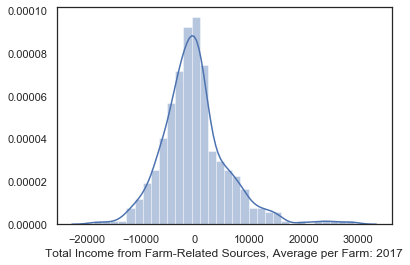

In [250]:
# distribution of residual
sns.distplot(y_test-y_test_predict_ridge)

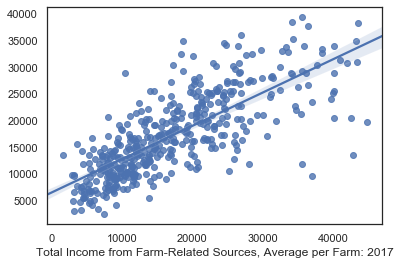

In [251]:
sns.regplot(y_test,y_test_predict_ridge)

In [252]:
ridge_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_predict_ridge)**2)))#**(1/2)
ridge_rmse

6125.91511871763

# Lasso

## Find optimal alpha 

In [354]:
# # Find the optimal alpha value for Lasso regression
modelasso = LassoCV(alphas=alphas2,cv=10,normalize=False,max_iter=50000)
modelasso.fit(inputs_scaled, target) 


LassoCV(alphas=[14, 15, 16, 17, 11, 12, 13], copy_X=True, cv=10, eps=0.001,
        fit_intercept=True, max_iter=50000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [355]:
modelasso.alpha_

15

In [356]:
# use the best alpha and fit it into model 
model_lasso = Lasso(alpha=modelasso.alpha_,normalize=False)
model_lasso.fit(x_train, y_train)

Lasso(alpha=15, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [357]:
# count = 0
# for num in model_lasso.coef_:
#     if (num < .00001 and num > -.00001):
#         print(count)
#     count += 1
# model_lasso
# x_train.columns

In [358]:
train_score_lasso = model_lasso.score(x_train, y_train)  
test_score_lasso = model_lasso.score(x_test, y_test) 
print("Lasso Regression test score: {:2f}%".format(test_score_lasso* 100))
print("Lasso Regression train score: {:2f}%".format(train_score_lasso * 100))

Lasso Regression test score: 57.571403%
Lasso Regression train score: 61.995669%


In [359]:
Inputs.columns

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
       'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
       'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
       'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
       'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
       'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
       'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017',
       ...
       'Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017',
       'Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Land in Orchards as Percent of Cropland Acreage: 2017',
       'Total Acres of Avocados, as Percent of Land in Orchards: 2017',
       'Total Acres of Grapefruit, a

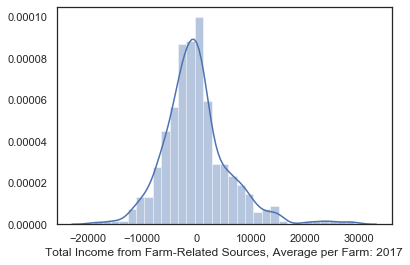

In [360]:
# to get y_test_predict
y_test_predict_lasso=model_lasso.predict(x_test)
# distribution of residual
sns.distplot(y_test-y_test_predict_lasso)

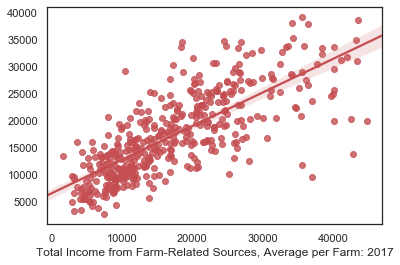

In [361]:
sns.regplot(y_test,y_test_predict_lasso,color='r')

In [363]:
lasso_rmse=np.sqrt((1/len(y_test))*(sum(y_test-y_test_predict_ridge)**2))#**(1/2)
lasso_rmse 

1176.9903491995613

# Compare models' RMSE

In [330]:
avg = abs(sum(model_lasso.coef_)) / len(model_lasso.coef_)
above_avg_lasso_coeff_index = []
count = 0
for num in model_lasso.coef_:
    if (abs(num) > avg):
        above_avg_lasso_coeff_index.append(count)
    count += 1

In [364]:
lr_rmse,ridge_rmse,lasso_rmse

(6149.082439975812, 6125.91511871763, 1176.9903491995613)

In [365]:
lasso_rmse
#min(lr_rmse,ridge_rmse,lasso_rmse)

1176.9903491995613

 Lasso's RMSE is the smallest so we choose Lasso

# Parameters of each independent variables

In [215]:
feature=pd.DataFrame()
feature['feature']=list(x_train.columns)
feature['weight']=list(model_lasso.coef_)
Feature=feature.sort_values(by='weight', ascending=False).reset_index().drop(columns='index')
Feature.head()

feature       weight
0                Horses and Ponies - Inventory: 2017  2282.632777
1            Net Cash Farm Income of Producers: 2017  1996.494423
2  Total Received from Government Payments, Avera...  1825.619860
3  Estimated Market Value of All Machinery and Eq...  1819.345794
4  Average Number of Harvested Cropland Acres per...  1247.937829

In [216]:
np.mean(Feature['weight'])

102.24791302496696

In [217]:
Feature[abs(Feature['weight'])>=np.mean(Feature['weight'])]

feature       weight
0                  Horses and Ponies - Inventory: 2017  2282.632777
1              Net Cash Farm Income of Producers: 2017  1996.494423
2    Total Received from Government Payments, Avera...  1825.619860
3    Estimated Market Value of All Machinery and Eq...  1819.345794
4    Average Number of Harvested Cropland Acres per...  1247.937829
..                                                 ...          ...
130  Percent of Land in Farms Operated by Part Owne... -1254.943023
131  Expenses for Fertilizer, Lime, and Soil Condit... -1403.090716
132  Acres of All Types of Pastureland as Percent o... -2129.238387
133                              Number of Farms: 2017 -2598.512904
134  Acres of Total Cropland as Percent of Land in ... -2857.794192

[99 rows x 2 columns]

In [218]:
Feature.sort_values(by='feature').tail(10)

feature      weight
115  Value of Other Crops and Hay Sold as Percent o... -405.065144
118  Value of Sheep, Goats, Wool, Mohair, and Milk ... -429.454469
64   Value of Tobacco Sold as Percent of Total Mark...  112.463205
94   Vegetables, Harvested Acres, as Percent of Har...  -35.567258
89                               farm_size_Size_Leve_2   -0.000000
34                               farm_size_Size_Leve_3  384.407192
102                              farm_size_Size_Leve_4 -130.661066
38                                      region_region1  316.988941
84                                      region_region2    0.000000
57                                      region_region3  160.314492

In [219]:
list(Feature['feature'])

['Horses and Ponies - Inventory: 2017',
 'Net Cash Farm Income of Producers: 2017',
 'Total Received from Government Payments, Average Per Farm: 2017',
 'Estimated Market Value of All Machinery and Equipment on Operation, Average per Farm: 2017',
 'Average Number of Harvested Cropland Acres per Tractor: 2017',
 'Estimated Market Value of Land and Buildings, Average per Farm: 2017',
 'Value of Cotton and Cottonseed Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Percent of Land in Farms Rented or Leased: 2017',
 'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Percent of Farms Operated by Partnership: 2017',
 'Percent of Farms Operated by Family or Individual: 2017',
 'Average Value of Agricultural Products Sold per Farm: 2017',
 'Percent of Farms Operated by Corporation: 2017',
 'Percent of Farms with Sales of Less Than $10,000: 2017',
 'Meat and Other Goats - Inventory: 2017',
 'Percent of Farms Operated by Ful

# Top 5 independent variables 

## which positively affect  average of total income of farm 

In [220]:
Feature['feature'][4]

'Average Number of Harvested Cropland Acres per Tractor: 2017'

##  which negatively affect average of total income of farm 


In [221]:
Feature.tail()

feature       weight
130  Percent of Land in Farms Operated by Part Owne... -1254.943023
131  Expenses for Fertilizer, Lime, and Soil Condit... -1403.090716
132  Acres of All Types of Pastureland as Percent o... -2129.238387
133                              Number of Farms: 2017 -2598.512904
134  Acres of Total Cropland as Percent of Land in ... -2857.794192

`Nearly 40% of 2019 farm income will come from federal aid and insurance`
` https://www.axios.com/farmers-income-insurance-federal-aid-bankruptcies-5a05b8cb-3348-447b-8bac-ee718fd409fd.html`

# Remove some columns

In [222]:
Inputs.columns

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
       'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
       'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
       'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
       'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
       'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
       'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017',
       ...
       'Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017',
       'Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Land in Orchards as Percent of Cropland Acreage: 2017',
       'Total Acres of Avocados, as Percent of Land in Orchards: 2017',
       'Total Acres of Grapefruit, a

In [223]:
list_index=[8,11,15,20,33,34,43,45,47,50,97,96,95,94,89,88,87,86,85,85,102,103,113,
           114,115,116,117,120,121,122,123,124,130,131,132,133,134,135,136]
remove_col=[]
for i in list_index:
    remove_col.append(cleaned_data1.columns[i])
remove_col
    

['Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
 'Value of Tobacco Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Value of Sheep, Goats, Wool, Mohair, and Milk Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Average Value per Farm of Agricultural Products Sold Directly to Consumers: 2017',
 'Expenses for Gasoline, Fuels, and Oils Purchased as Percent of Total Farm Production Expenses: 2017',
 'Expenses for Utilities as Percent of Total Farm Production Expenses: 2017',
 'Land in Farms - Change in Acreage: 2012 to 2017',
 'Irrigated Land - Change in Acreage: 2012 to 2017',
 'Total Cropland - Change in Acreage: 2012 to 2017',
 'Harvested Cropland - Change in Acreage: 2012 to 2017',
 'Meat and Other Goats - Inventory: 2017',
 'All Goats - Inventory: 2017',
 'Sheep and Lambs - Change in Inventory: 2012 to 2017',
 'Number of Cattle and Calves Sold: 2017',
 'Number of Farms with Hispanic, Latino, or Spanish Orig

In [224]:
dropped_data=cleaned_data1.drop(columns=remove_col)

In [225]:
len(dropped_data.columns)

103

In [226]:
dropped_data_with_dum=pd.get_dummies(dropped_data,drop_first=True)
dropped_data_with_dum.head()

Number of Farms: 2017  Change in Number of Farms: 2012 to 2017  \
0                    371                                    -0.17   
1                    842                                    -0.59   
2                    498                                    -0.50   
3                    205                                     0.27   
4                   1146                                    -0.28   

   Average Size of Farms in Acres: 2017  \
0                                 305.0   
1                                 208.0   
2                                 307.0   
3                                 273.0   
4                                 129.0   

   Percent of Farms with Sales of Less Than $10,000: 2017  \
0                                              57.68        
1                                              60.57        
2                                              64.26        
3                                              72.68        
4                                              60.82        

   Percent of Farms with Sales of $10,000 to $249,999: 2017  \
0                                              38.27          
1                                              28.86          
2                                              26.31          
3                                              25.85          
4                                              25.13          

   Percent of Farms with Sales of $250,000 or More: 2017  \
0                                               4.04       
1                                              10.57       
2                                               9.44       
3                                               1.46       
4                                              14.05       

   Average Value of Agricultural Products Sold per Farm: 2017  \
0                                            57844.0            
1                                           142972.0            
2                                           211977.0            
3                                            20484.0            
4                                           211916.0            

   Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017  \
0                                              58.41                                          
1                                              84.41                                          
2                                              11.46                                          
3                                              53.48                                          
4                                               5.45                                          

   Value of Grains, Oilseeds, Dry Beans, and Dry Peas Sold as Percent of Total Market Value of Agricultural Products Sold: 2017  \
0                                               3.92                                                                              
1                                               9.11                                                                              
2                                               1.52                                                                              
3                                              19.42                                                                              
4                                               0.53                                                                              

   Value of Cotton and Cottonseed Sold as Percent of Total Market Value of Agricultural Products Sold: 2017  \
0                                              24.25                                                          
1                                               6.82                                                          
2                                               4.09                                                          
3                            

In [227]:
new_target=dropped_data_with_dum['Total Income from Farm-Related Sources, Average per Farm: 2017']

In [228]:
new_dropped_inputs=dropped_data_with_dum.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

# Analyze data in different region 

## region one 

In [229]:
cleaned_data1.columns[:10]

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Percent of Farms with Sales of Less Than $10,000: 2017',
       'Percent of Farms with Sales of $10,000 to $249,999: 2017',
       'Percent of Farms with Sales of $250,000 or More: 2017',
       'Average Value of Agricultural Products Sold per Farm: 2017',
       'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
       'Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
       'Value of Grains, Oilseeds, Dry Beans, and Dry Peas Sold as Percent of Total Market Value of Agricultural Products Sold: 2017'],
      dtype='object')

In [230]:
cleaned_data1['region'].value_counts()

region1    882
region2    878
region3    291
region0    188
Name: region, dtype: int64

In [366]:
# obtain each region data
region_1=cleaned_data1[cleaned_data1['region']=='region0']
region_2=cleaned_data1[cleaned_data1['region']=='region1']
region_3=cleaned_data1[cleaned_data1['region']=='region2']
region_4=cleaned_data1[cleaned_data1['region']=='region3']

In [232]:
# get dummy variables for each region
region_1_dummy=pd.get_dummies(region_1,drop_first=True)
region_2_dummy=pd.get_dummies(region_2,drop_first=True)
region_3_dummy=pd.get_dummies(region_3,drop_first=True)
region_4_dummy=pd.get_dummies(region_4,drop_first=True)

In [367]:
## get target and inputs for each regions 
region_1_target=region_1_dummy['Total Income from Farm-Related Sources, Average per Farm: 2017']
region_1_inputs=region_1_dummy.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

region_2_target=region_2_dummy['Total Income from Farm-Related Sources, Average per Farm: 2017']
region_2_inputs=region_2_dummy.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

region_3_target=region_3_dummy['Total Income from Farm-Related Sources, Average per Farm: 2017']
region_3_inputs=region_3_dummy.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

region_4_target=region_4_dummy['Total Income from Farm-Related Sources, Average per Farm: 2017']
region_4_inputs=region_4_dummy.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

# My own Funtions

In [ ]:
# 
def scaled_train_test_feature_selection_regression(inputs,target):
    #scaled data
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    inputs_scaled
    # train_test_split
    x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target, test_size=0.2, random_state=365)
    ## feature selection
    feature_columns1=inputs.columns
    x_train =pd.DataFrame(data=x_train, columns=feature_columns1)
    x_test =pd.DataFrame(data=x_test, columns=feature_columns1)
    # Create correlation matrix
    corr_matrix = x_train.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    x_train.drop(columns=to_drop, inplace=True)
    x_test.drop(columns=to_drop, inplace=True)
    # linear regression
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    # Get score
    test_accuracy = reg.score(x_test, y_test)
    train_accuracy = reg.score(x_train, y_train)
    # get prediction
    y_test_reg_pred=reg.predict(x_test)
    lr_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_reg_pred)**2)))
    
     # Ridge
    alphas=[15,14,13,12,11,10,9,8,7,6,5,4,3,2, 1.6,1.5, 1.49,1.48,1.47,
    1.46,1.47,1.4,1.3,1.2
    ,1.1, 1.05, 1.01,1.0, 0.5, 
    0.1, 0.05, 0.01, 0.005,
    0.001, 0.0005, 0.0001]    
    
    # get optimal alpha
    model1 = RidgeCV(alphas=alphas, normalize=False)
    model1.fit(inputs_scaled, target)     
    #  regression for train data 
    model_ridge = Ridge(alpha=model1.alpha_ ,normalize=False)
    model_ridge.fit(x_train, y_train)
    # obtian score for ridge regression
    train_score_ridge = model_ridge.score(x_train, y_train)  
    test_score_ridge = model_ridge.score(x_test, y_test)  
    y_test_predict_ridge=model_ridge.predict(x_test)
    ridge_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_predict_ridge)**2)))#**(1/2)
    
    # Lasso 
    # get optimal alpha
    modelasso = LassoCV(alphas=alphas,cv=10,normalize=False,max_iter=50000)
    modelasso.fit(inputs_scaled, target) 

    # use the best alpha and fit it into model 
    model_lasso = Lasso(alpha=modelasso.alpha_ ,normalize=False)
    model_lasso.fit(x_train, y_train)
    # obtian score 
    train_score_lasso = model_lasso.score(x_train, y_train)  
    test_score_lasso = model_lasso.score(x_test, y_test) 
    #obtian prediction value 
    y_test_predict_lasso=model_lasso.predict(x_test)
    lasso_rmse=np.sqrt((1/len(y_test))*(sum(y_test-y_test_predict_ridge)**2))  

    
    return  ("Linear Regression_test_score: "+str(test_accuracy),
            "Linear Regression_train_score: "+str(train_accuracy),
            "Linear Regression_RMSE: "+str(lr_rmse),
             
            "Ridge Regression_test_score: "+str(test_score_ridge),
            "Ridge Regression_train_score: "+str(train_score_ridge),
            "Ridge Regression_RMSE: "+str(ridge_rmse),
             
            "Lasso Regression_test_score: "+str(test_score_lasso),
            "Lasso Regression_train_score: "+str(train_score_lasso),
            "Lasso Regression_RMSE: "+str(lasso_rmse)
            )    

In [ ]:
## get target and inputs for each regions 
scaled_train_test_feature_selection_regression(region_1_inputs,region_1_target)

In [ ]:
scaled_train_test_feature_selection_regression(region_2_inputs,region_2_target)

In [ ]:
scaled_train_test_feature_selection_regression(region_3_inputs,region_3_target)

In [ ]:
scaled_train_test_feature_selection_regression(region_4_inputs,region_4_target)